***
## Importar librerías y dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')


## Carga de datos

#### **Dataset from a bank from a telemarketing campaing**

##### Demographic Information:
    age: Age of the individual.
    job: Type of job (e.g., blue-collar, management).
    marital: Marital status (e.g., single, married, divorced).
    education: Education level (e.g., primary, secondary, tertiary).
    default: Has the individual defaulted on a loan? (yes/no)
##### Housing and Financial Information:
    housing: Housing loan status (yes/no).
    loan: Personal loan status (yes/no).
    contact: Contact method (e.g., cellular, telephone).
    month: Month of the last contact.
    day_of_week: Day of the week of the last contact.
    duration: Last contact duration in seconds.
    campaign: Number of contacts performed during this campaign for this client.
    pdays: Number of days that passed after the previous campaign for this client.   
    previous: Number of contacts performed before this campaign for this client.
    poutcome: Outcome of the previous marketing campaign (e.g., success, failure, unknown).

**__According to the dataset, the column "duration" should be removed because it highly affects the output (duration=0 --> 'no', other duration -->'yes'), and the duration is only known after the call is done.__**


##### Economic Indicators (they are macro-economical indicators):
    - emp.var.rate: Employment variation rate - QUARTERLY indicator of the variation in the number of employed people. Represented with floatings.(see cons.price.idx for more info.)
    - cons.price.idx: Consumer price index - monthly indicator of the variation in consumer prices. (Same as IPC in ARGENTINA). It is represented with floatings, e.g.: 1.1 means the employment increased by 1.1% ; -3.2 means the employment decreased by -3.2%.
    - cons.conf.idx: Consumer confidence index - monthly measure of consumer sentiment about the overall economic health of a country. It's often used as an indicator of future economic activity.
    - euribor3m: 3-month Euribor rate - interest rate at which banks in the Eurozone lend money to each other for a 3-month period. Different values can lead to higher/lower interest rates for consumers on loans and mortgages.
    - nr.employed: Number of employees - quarterly indicator of the total number of employed people.
##### Target Variable:
    y: Has the client subscribed a term deposit (yes/no)?. A term deposit is a deposit that a bank or financial insitution offers with a fixed rate in which your money will be returned back at a specific maturity time. In spanish, we call it "Plazo fijo".


In [5]:
data = pd.read_excel('bankdata.xlsx')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Year,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,2008,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,2008,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,2008,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,2008,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,2008,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,2010,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,2010,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,2010,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,2010,yes


## Transformacion de datos

- Agregar una columna con el número del mes (que no sea str sino int). Notar que no están todos los meses, y que los que están son irregulares. Debemos identificar de alguna forma a qué año corresponde c/u para crear una línea temporal.


In [8]:
dic={   'jan': 1,
        'feb': 2,
        'mar': 3,  
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12}
data['month'] =data['month'].replace(dic)

In [9]:
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Year,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,2008,no
1,57,services,married,high.school,unknown,no,no,telephone,5,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,2008,no
2,37,services,married,high.school,no,yes,no,telephone,5,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,2008,no


- Agregar una col que tenga la var intermensual de inflación (surge de la resta de: (IPC(mes+1) - IPC(mes)) / IPC(mes). Para el primer mes deberíamos poner 0, porque no tenemos un valor previo. Para el resto podemos calcularlo.

In [11]:
dataCopy = data.copy()
dataCopy.rename(columns={'month': 'month_Column','Year': 'Year_Column'}, inplace=True)
agrupamiento = dataCopy.groupby(['Year_Column', 'month_Column'])['cons.price.idx'].mean()
# Se valida que la los datos de la tabla es el mismo aplicando las diferentes funciones
# agrupamiento = data.groupby(['Year_Column', 'month_Column'])['cons.price.idx'].first()
# agrupamiento = data.groupby(['Year_Column', 'month_Column'])['cons.price.idx'].min()
# agrupamiento = data.groupby(['Year_Column', 'month_Column'])['cons.price.idx'].max()
# agrupamiento = data.groupby(['Year_Column', 'month_Column'])['cons.price.idx'].last()

df_resultado = agrupamiento.reset_index()
# df_resultado

# Crear una nueva columna 'IPC_mes_siguiente' que desplaza los valores de IPC un mes hacia adelante
df_resultado['IPC_mes_siguiente'] = df_resultado['cons.price.idx'].shift(-1)

# Función para calcular la variación intermensual
def calcular_variacion(row):
    if pd.isna(row['IPC_mes_siguiente']):
        return 0  # TODO: Agregar calculo de ((ICP_dec_2010 - ICP_nov_2010) / ICP_nov_2010) * 100
    else:
        return ((row['IPC_mes_siguiente'] - row['cons.price.idx']) / row['cons.price.idx']) * 100

# Aplicar la función a cada fila y crear la columna 'variacion_inflacion'
df_resultado['variacion_inflacion'] = df_resultado.apply(calcular_variacion, axis=1)

# Eliminar la columna auxiliar 'IPC_mes_siguiente'
df_resultado = df_resultado.drop('IPC_mes_siguiente', axis=1)

# Mostrar los resultados
df_resultado

,Year_Column,month_Column,cons.price.idx,variacion_inflacion
0,2008,5,93.994,0.501096
1,2008,6,94.465,-0.579050
2,2008,7,93.918,-0.504696
3,2008,8,93.444,0.378837
4,2008,10,93.798,-0.637540
5,2008,11,93.200,-0.476395
6,2008,12,92.756,0.093794
7,2009,3,92.843,0.249884
8,2009,4,93.075,-0.195541
9,2009,5,92.893,0.075356


# Dataset explanation

# First exploratory analysis

### Things we can do:
1. Find missing values
2. Explore the categorical features
3. Explore the distribution of the categorical features
4. Relationship between categorical features and target value
5. Explore numerical features - which ones are discrete / continuous?
6. Explore the relation between numerical features and target value
7. Find outliers
8. Correlation between numerical features
9. Pair-plots.
10. Is the dataset balanced or not?
11. Create new features
12. iterate the process to further enhance the analysis

### Drop duration column. It won't be used for the analysis.

In [16]:
data.drop('duration', axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Year,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,2008,no
1,57,services,married,high.school,unknown,no,no,telephone,5,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,2008,no
2,37,services,married,high.school,no,yes,no,telephone,5,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,2008,no
3,40,admin.,married,basic.6y,no,no,no,telephone,5,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,2008,no
4,56,services,married,high.school,no,no,yes,telephone,5,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,2008,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,2010,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,2010,no
41185,56,retired,married,university.degree,no,yes,no,cellular,11,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,2010,no
41186,44,technician,married,professional.course,no,no,no,cellular,11,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,2010,yes


### Nulls, type of data per column, number of unique data per column

In [18]:
missing_values = data.isnull().sum().sum()
print(f' "there are {missing_values} missing values" ') 

 "there are 0 missing values" 


In [19]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month               int64
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
Year                int64
y                  object
dtype: object

In [20]:
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
Year                 3
y                    2
dtype: int64

In [21]:
# There are duplicate rows in our dataset. We can confirm it using the duplicated function.
print(f' "there are {data.duplicated().sum()} duplicated values" ') #comment this row and run the cell to see the duplicated rows.
data_duplicates = data.copy()
data_duplicates['duplicates'] = data.duplicated()
duplicate_rows = data_duplicates[data_duplicates['duplicates'] == True]


 "there are 12 duplicated values" 


In [22]:
#data['nr.employed'].unique()
#data['cons.price.idx'].unique()
#data['cons.conf.idx'].unique()
#data['euribor3m'].unique()
#data['nr.employed'].unique()
#list = data['age'].unique().copy()
#list.sort()
#list
duplicate_rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Year,y,duplicates
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,5,thu,...,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,2008,no,True
12261,36,retired,married,unknown,no,no,no,telephone,7,thu,...,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,2008,no,True
14234,27,technician,single,professional.course,no,no,no,cellular,7,mon,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,2008,no,True
16956,47,technician,divorced,high.school,no,yes,no,cellular,7,thu,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,2008,no,True
18465,32,technician,single,professional.course,no,yes,no,cellular,7,thu,...,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,2008,no,True
20216,55,services,married,high.school,unknown,no,no,cellular,8,mon,...,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,2008,no,True
20534,41,technician,married,professional.course,no,yes,no,cellular,8,tue,...,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,2008,no,True
25217,39,admin.,married,university.degree,no,no,no,cellular,11,tue,...,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,2008,no,True
28477,24,services,single,high.school,no,yes,no,cellular,4,tue,...,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,2009,no,True
32516,35,admin.,married,university.degree,no,yes,no,cellular,5,fri,...,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,2009,no,True


### Categoricals - Exploring the variables with PLOTS

#### Ploting the distribution of each variable and key takeaways.

In [25]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print(f' There are {len(categorical_columns)} categorical columns \n\n')
for column in categorical_columns:
    unique_values = data[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")

 There are 10 categorical columns 


Column 'job' has 12 unique values.
Column 'marital' has 4 unique values.
Column 'education' has 8 unique values.
Column 'default' has 3 unique values.
Column 'housing' has 3 unique values.
Column 'loan' has 3 unique values.
Column 'contact' has 2 unique values.
Column 'day_of_week' has 5 unique values.
Column 'poutcome' has 3 unique values.
Column 'y' has 2 unique values.


Columns **job, month** and **education** have the highest number of unique values.

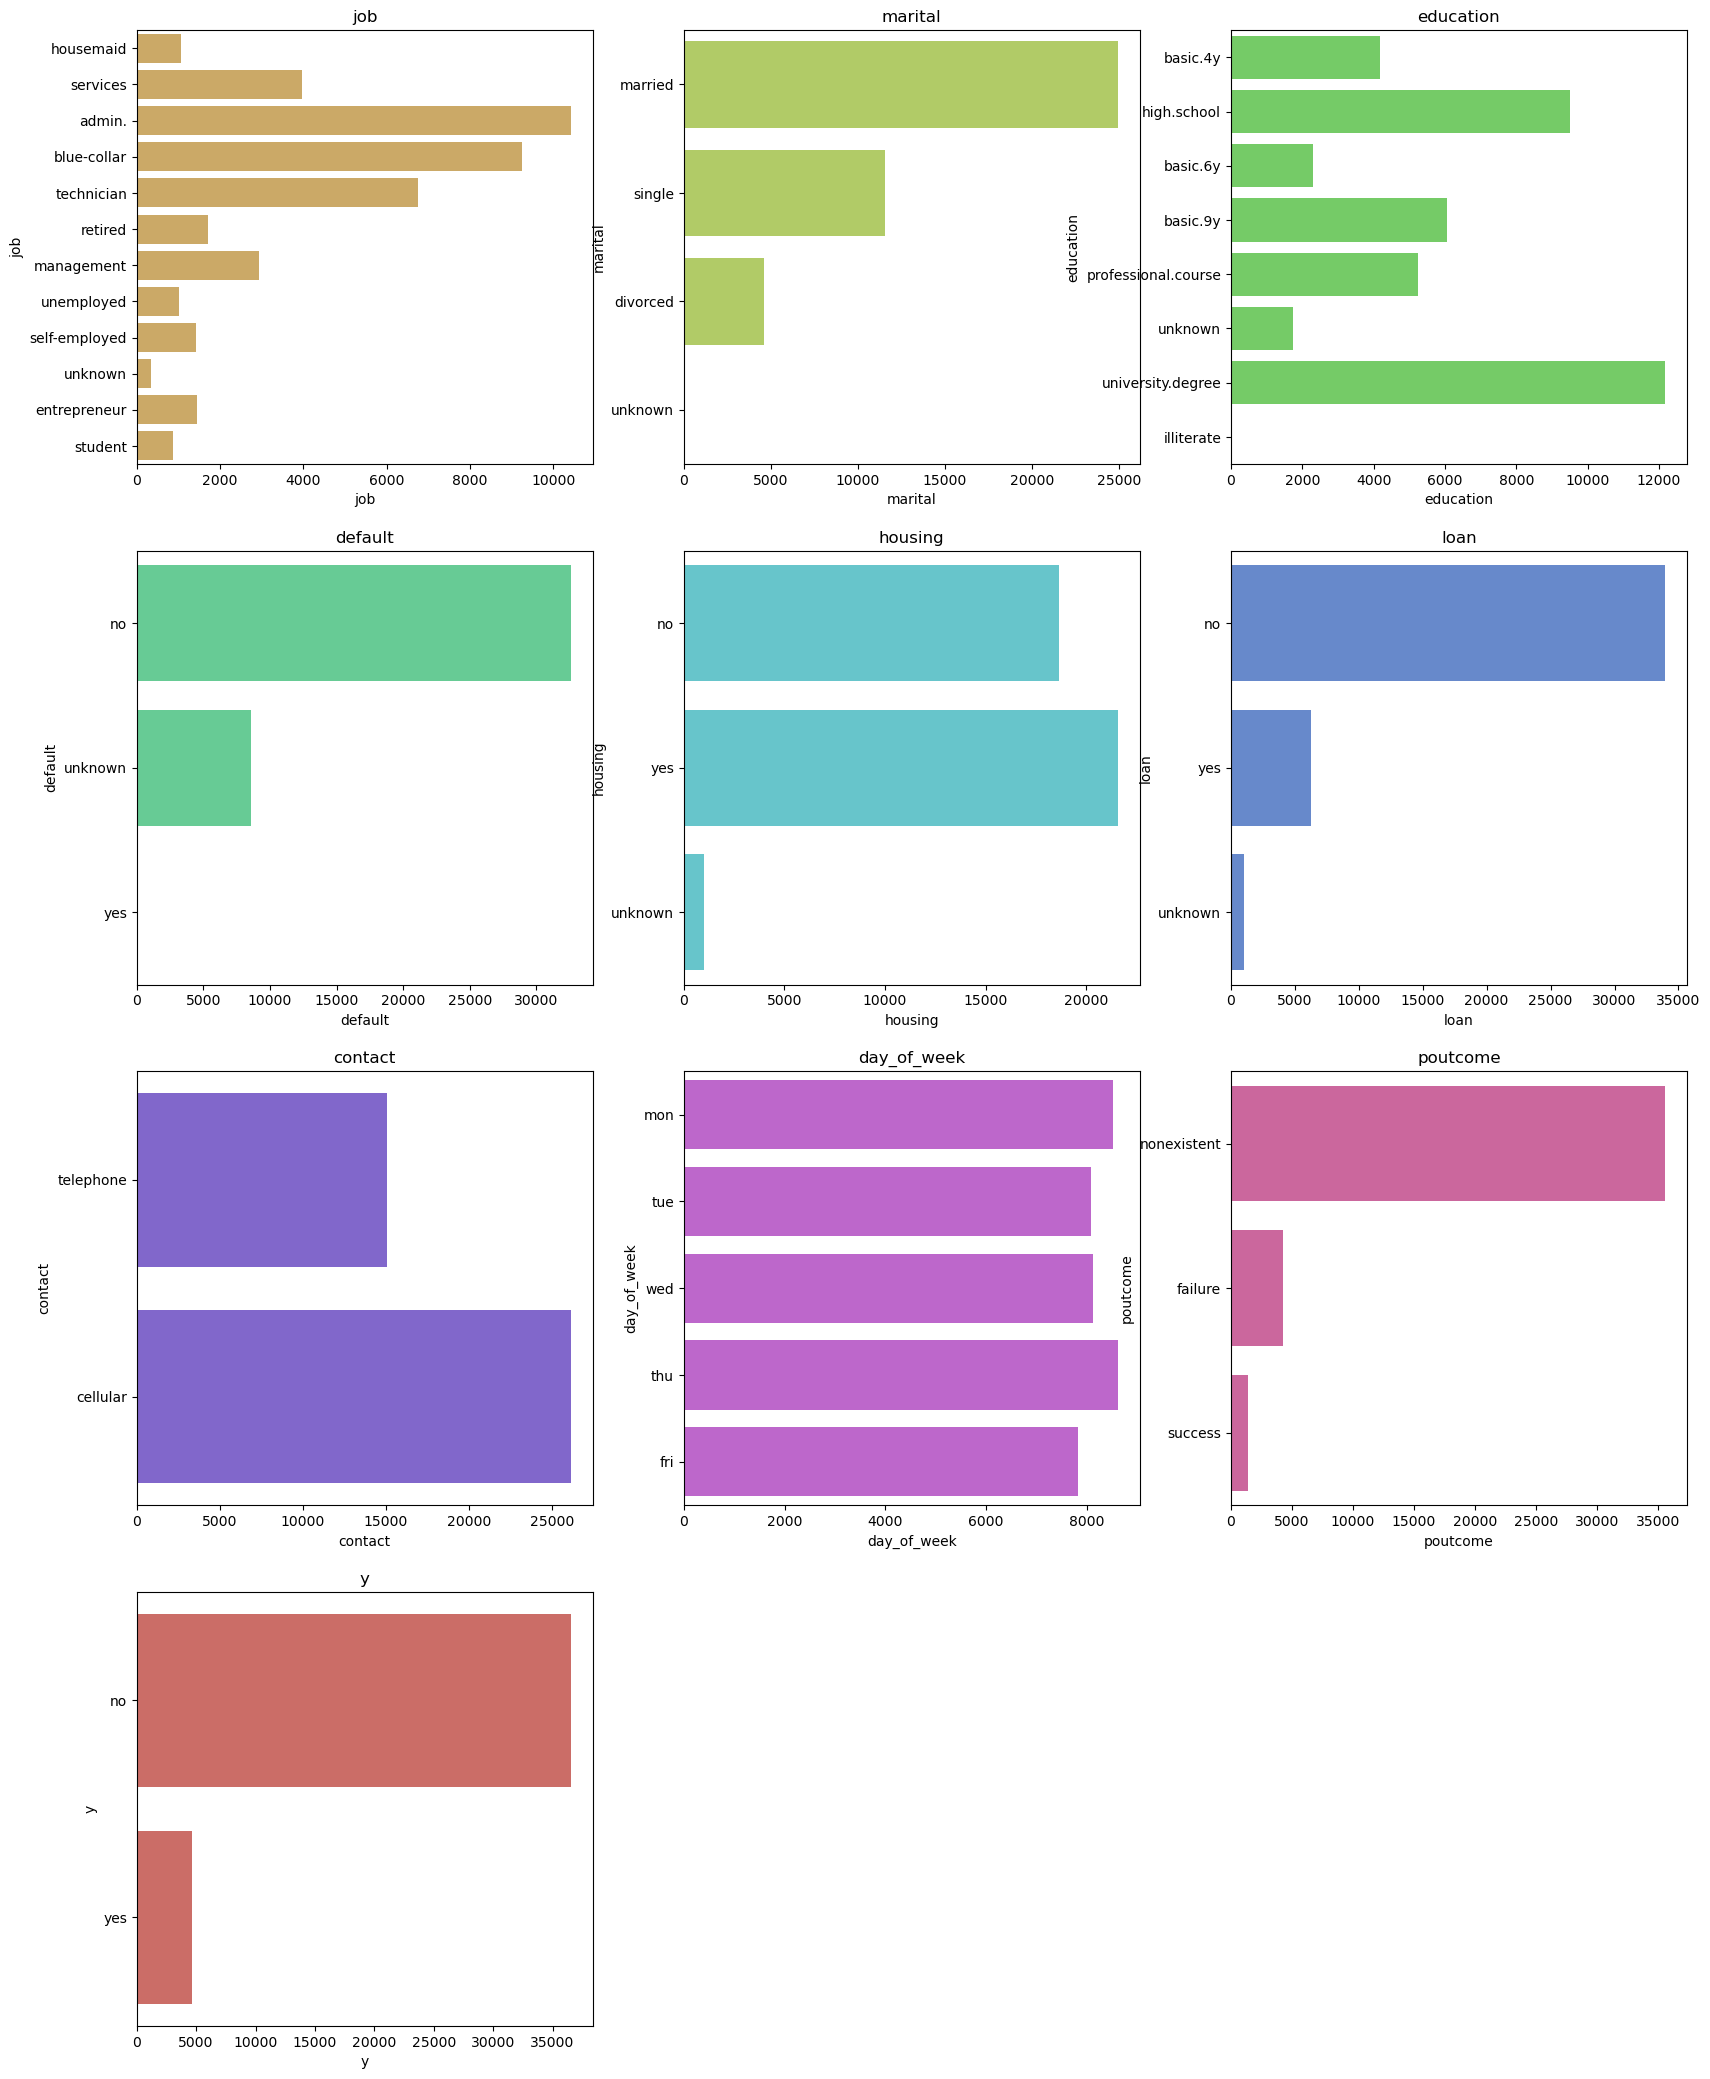

In [27]:
plt.figure(figsize=(20,80), facecolor = 'white')
plotnumber=1
color_palette = sns.color_palette("hls", len(categorical_columns))  # Adjust the palette as needed

for categorical_column in categorical_columns:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_column, data=data, ax=ax, color=color_palette[plotnumber % len(color_palette)])
    plt.xlabel(categorical_column)
    plt.title(categorical_column)
    plotnumber+=1

plt.show()

*OBSERVACIONES:*
- Los trabajos predominantes en la clientela son de tipo **admin, blue-collar** y **technician**.
- La mayoría de los clientes están **casados**.
- La mayoría de los clientes tienen un título **universitario** o han alcanzado como máximo un estudio **secundario completo**.
- La gran mayoría de los clientes **no ha solicitado préstamos o no tiene préstamos pendientes**, pero cuando a housing (hipoteca) se refiere, hay una distribución similar entre aquellos que han solicitado y aquellos que no.
- La mayoría de las llamadas han sido realizadas a teléfonos celulares y en el mes de mayo.
- **Los resultados (outcome/label) no están balanceados, estamos en frente de un dataset DESBALANCEADO**.

#### First statistical analysis

In [30]:
statistical_analysis = data[categorical_columns].copy()

#### Categorical FEATURES analysis

We are going to **remove** the columns which have the highest number of unique variables. This will help us create a clearer visualization. If we included the variables 'job', 'month', and 'education' along with the rest, the combination of each job, education level, and month with the output (YES or NO) would result in too many plots, making the visualization too small and unreadable
The columns to drop are: **job, month and education.**

Therefore, we will visualize job, month and education in separate cells.

In [33]:
categorical_columns_removed = categorical_columns.copy()
columns_to_remove = ['job','education', 'y']
for column in columns_to_remove:
    categorical_columns_removed.remove(column)

categorical_columns_removed

['marital', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome']

##### ***Plot for 'marital', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome'***

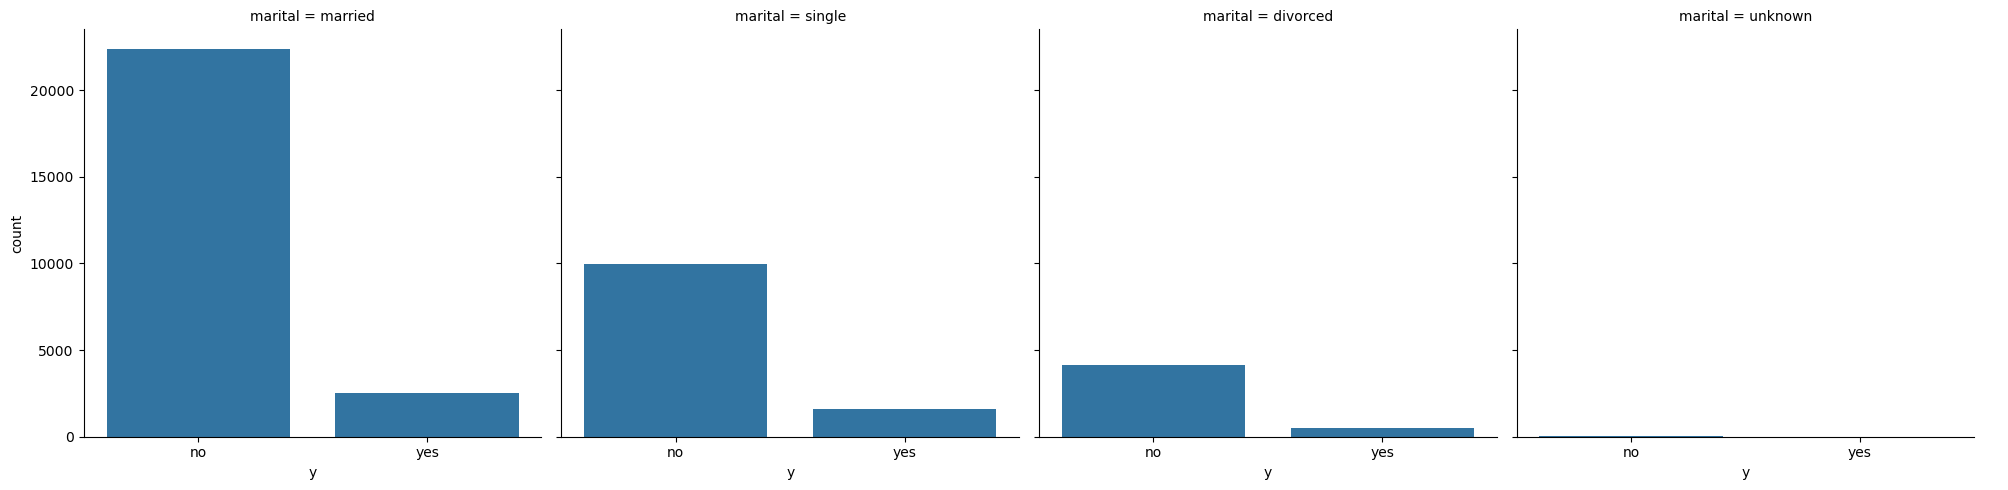

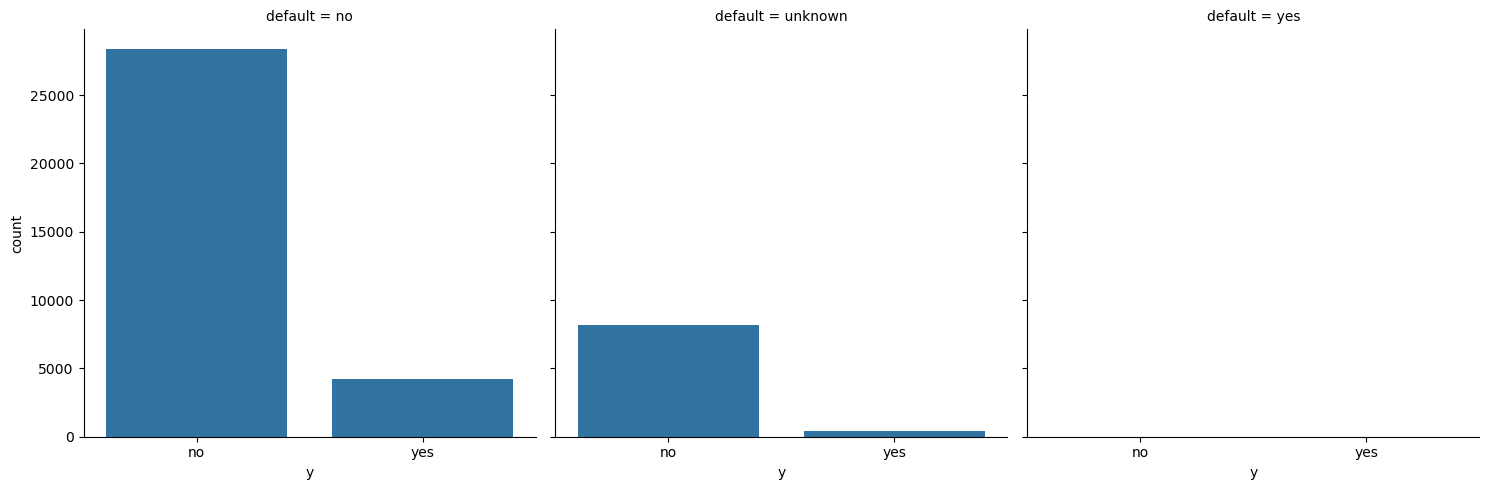

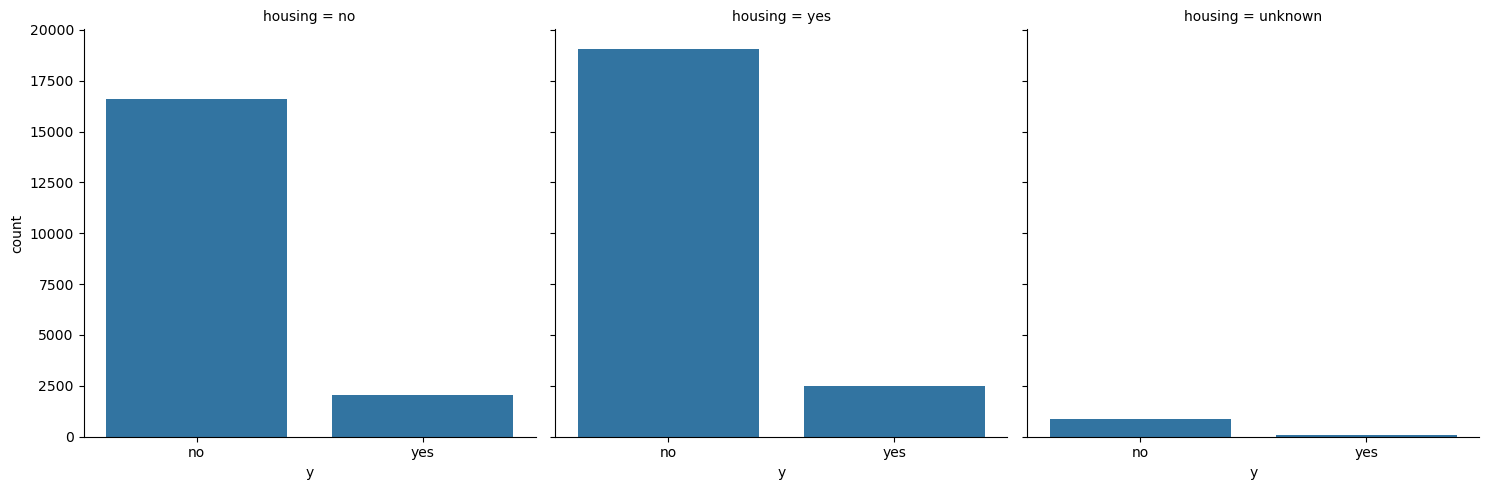

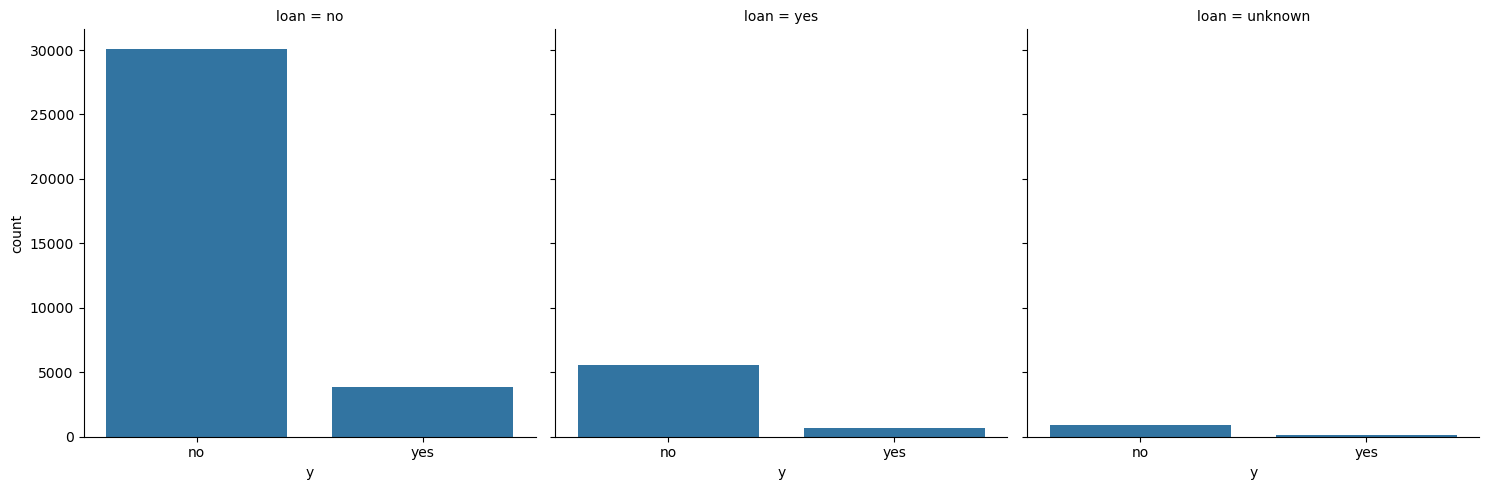

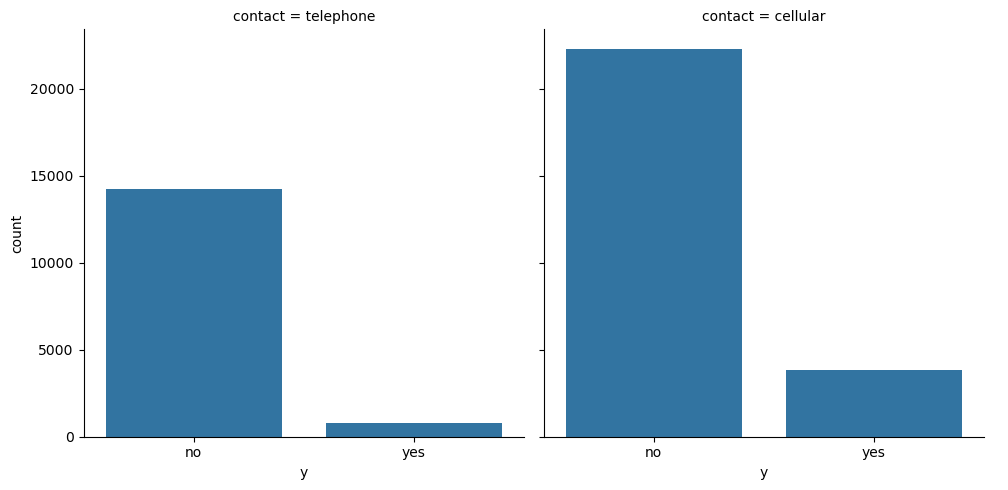

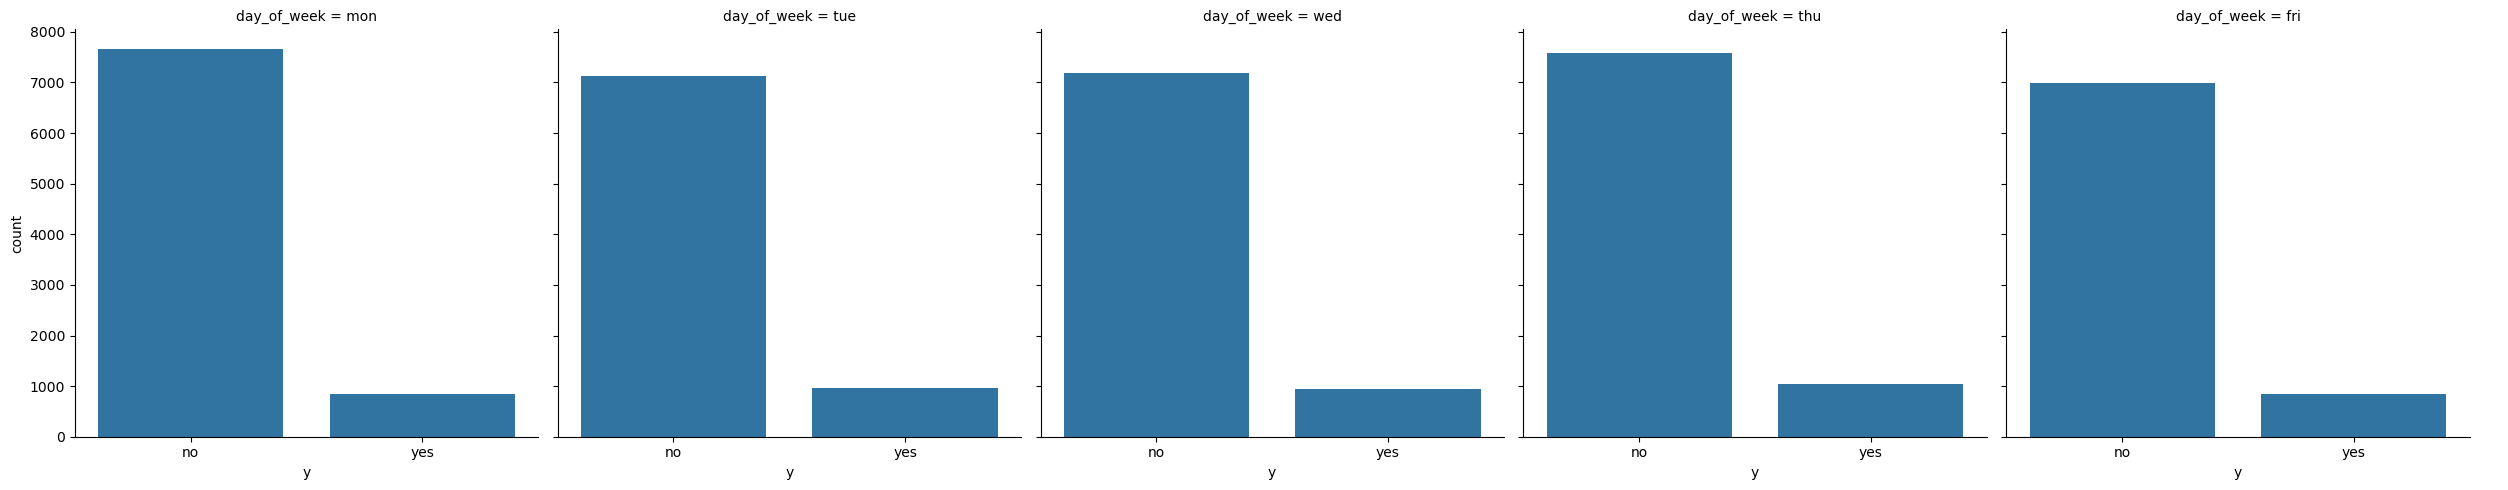

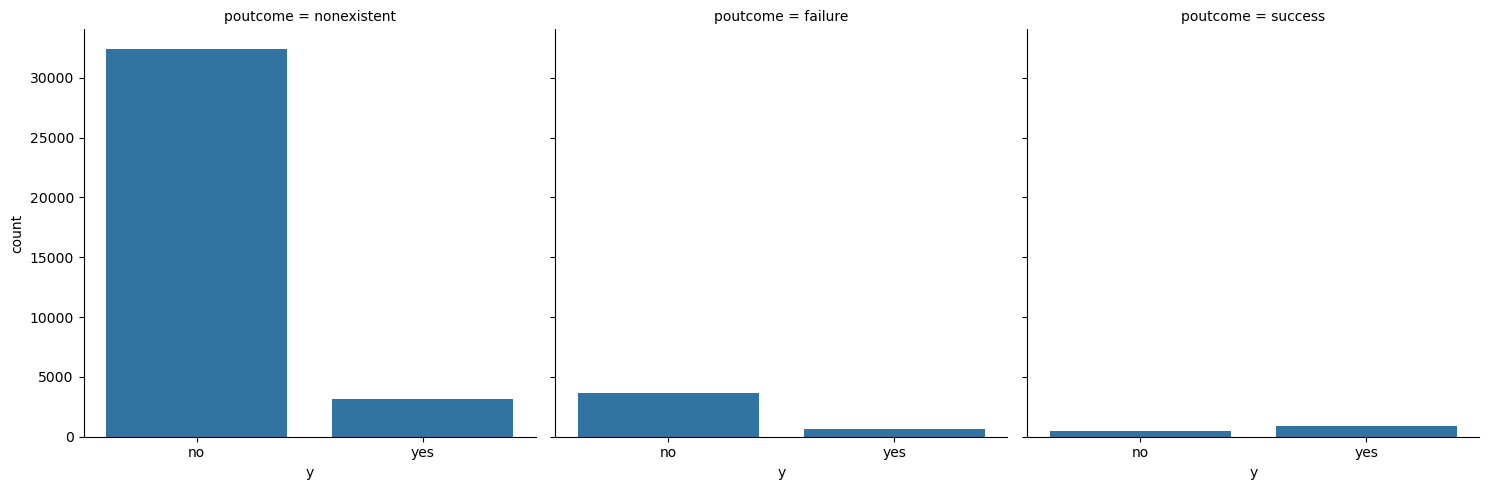

In [35]:
for column in categorical_columns_removed:
    sns.catplot(x='y', col=column, kind='count', data=data)

##### ***Plots for 'job', 'education', 'month'***

###### **JOB**

**In nominal terms:**

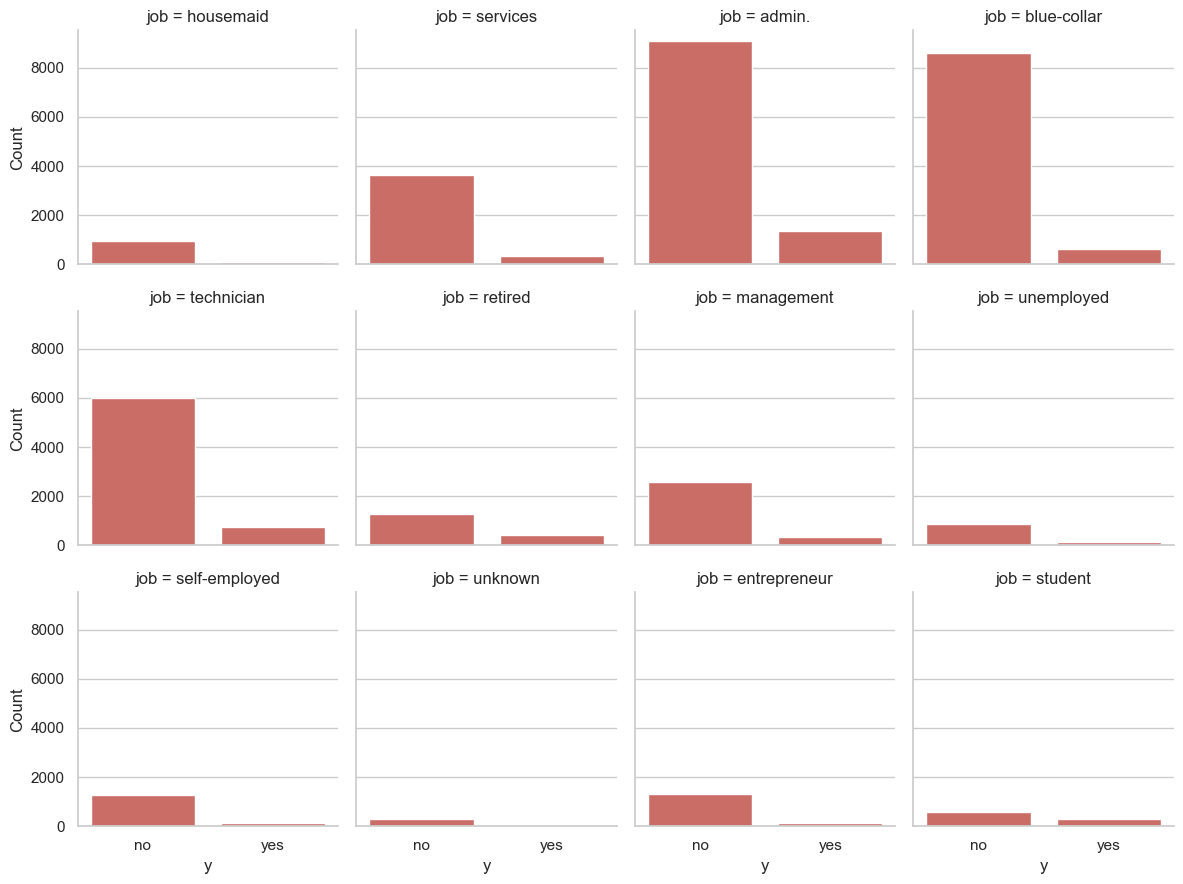

In [39]:
warnings.filterwarnings('ignore')

sns.set_theme(style="whitegrid")

palette = sns.color_palette("hls", len(data['y'].unique()))  # Adjust palette if needed

g = sns.FacetGrid(data, col="job", col_wrap=4, hue='y')
g.map(sns.countplot, "y", palette=palette)  # Pass the color palette
g.set_axis_labels("y", "Count")
plt.show()

**Percentually:**

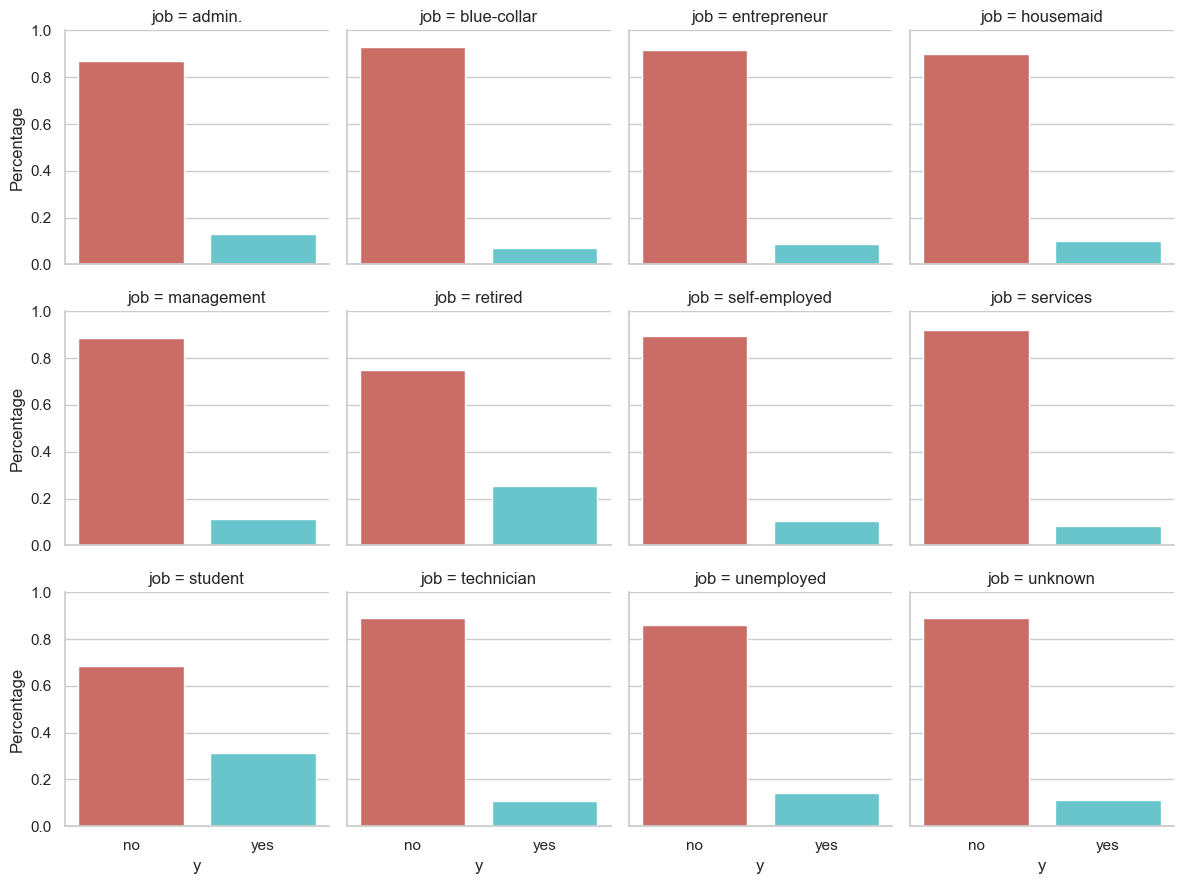

In [41]:
job_percent = data.groupby(['job','y'])
job_percent = job_percent.size() 
job_percent2 = job_percent.reset_index() #transform to df structure
job_percent2.columns = ['job', 'y', 'case_count'] #rename new column. By default it is named "0" and we can't manipulate it if it is not a string.
job_percent2['total_per_job'] = job_percent2.groupby(['job'])['case_count'].transform('sum') #create a column with the total of persons with each 
                                                                                            #job category
job_percent2['percentages'] = job_percent2['case_count'] / job_percent2['total_per_job'] #divide case_count by total_per_job to obtain the % distribution 
                                                                                        #of each job job
job_percent2

#now we plot the results by percent.
sns.set_theme(style="whitegrid")

palette = sns.color_palette("hls", len(job_percent2['y'].unique()))  # Adjust palette if needed

# Use sns.barplot instead of sns.countplot to plot the percentages
g = sns.FacetGrid(job_percent2, col="job", col_wrap=4, hue='y', sharey=True)
g.map(sns.barplot, "y", "percentages", palette=palette, order=job_percent2['y'].unique())  # Plot percentages
g.set_axis_labels("y", "Percentage")
g.set(ylim=(0, 1))  # Set y-axis limits from 0 to 1 for percentage scale
plt.show()


###### **EDUCATION**

**In nominal terms:**

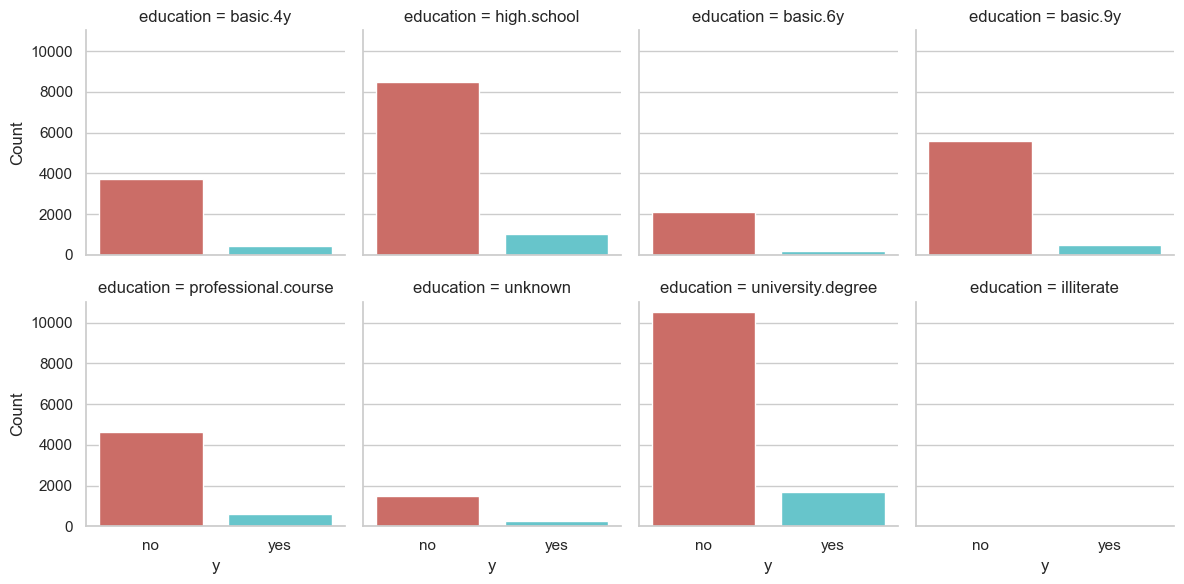

In [44]:
sns.set_theme(style="whitegrid")

palette = sns.color_palette("hls", len(data['y'].unique()))  # Adjust palette if needed

g = sns.FacetGrid(data, col="education", col_wrap=4)
g.map(sns.countplot, "y", palette=palette)  # Pass the color palette
g.set_axis_labels("y", "Count")
plt.show()

**Percentually:**

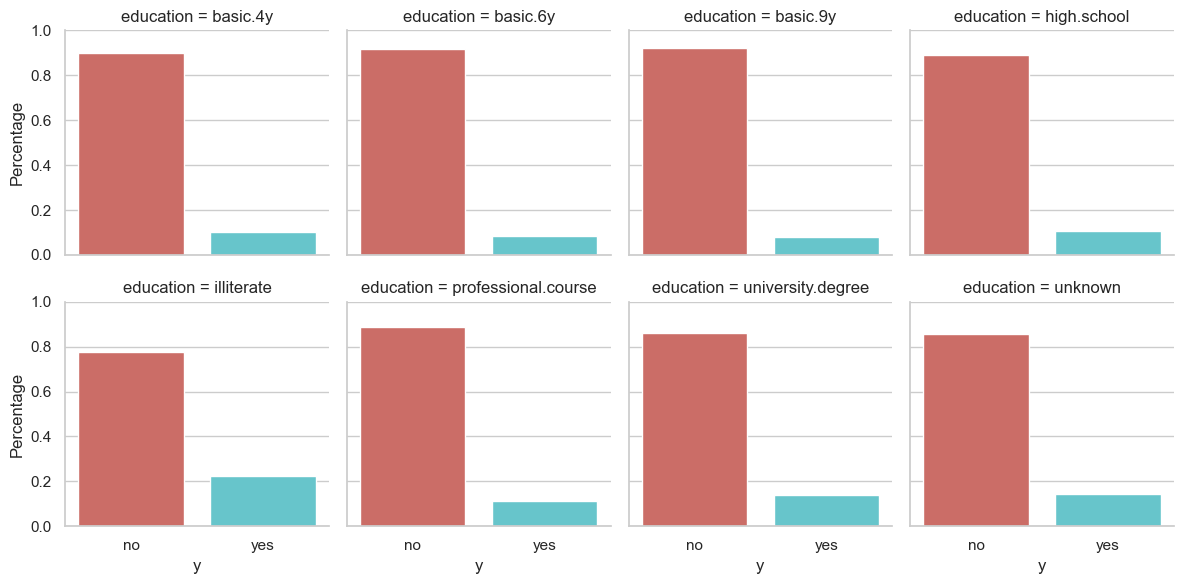

In [46]:
education_percent = data.groupby(['education','y'])
education_percent = education_percent.size() 
education_percent2 = education_percent.reset_index() #transform to df structure
education_percent2.columns = ['education', 'y', 'case_count'] #rename new column. By default it is named "0" and we can't manipulate it if it is not a string.
education_percent2['total_per_education'] = education_percent2.groupby(['education'])['case_count'].transform('sum') #create a column with the total of persons with each 
                                                                                            #job category
education_percent2['percentages'] = education_percent2['case_count'] / education_percent2['total_per_education'] #divide case_count by total_per_job to obtain the % distribution 
                                                                                        #of each job job
education_percent2

#now we plot the results by percent.
sns.set_theme(style="whitegrid")

palette = sns.color_palette("hls", len(education_percent2['y'].unique()))  # Adjust palette if needed

# Use sns.barplot instead of sns.countplot to plot the percentages
g = sns.FacetGrid(education_percent2, col="education", col_wrap=4, hue='y', sharey=True)
g.map(sns.barplot, "y", "percentages", palette=palette, order=education_percent2['y'].unique())  # Plot percentages
g.set_axis_labels("y", "Percentage")
g.set(ylim=(0, 1))  # Set y-axis limits from 0 to 1 for percentage scale
plt.show()

In [47]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'Year', 'y'],
      dtype='object')

###### **MONTH**

We want to examine the relationship between the month and the target variable. When plotting the nominal values for each month separately, the imbalance in the data makes it difficult to gather meaningful insights. It would be more effective to view the percentage relationship between the variables instead.

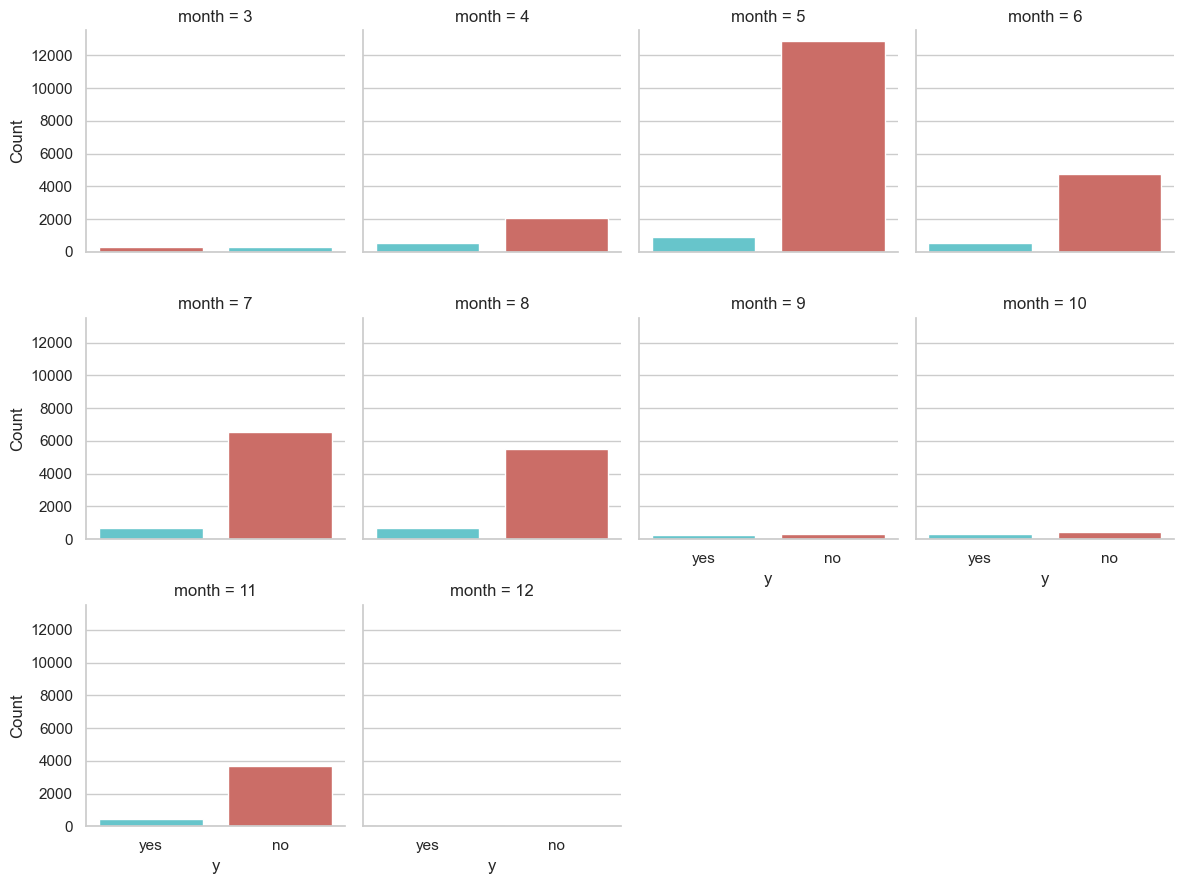

In [50]:
sns.set_theme(style="whitegrid")

palette = sns.color_palette("hls", len(data['y'].unique()))  # Adjust palette if needed
# data
g = sns.FacetGrid(data, col="month", col_wrap=4)
g.map(sns.countplot, "y", palette=palette)  # Pass the color palette
g.set_axis_labels("y", "Count")
plt.show()

In [51]:
#We prepare the data to analyze it by month, without taking into consideration the year.

grouped_data = data.groupby(['month','y'])
group_counts = grouped_data.size() 
group_counts2 = group_counts.reset_index() #transforma a estructura de dataframe
group_counts2.columns = ['month_Column', 'y', 'case_count'] #renombro la última columna pq al hacer groupby no tiene nombre.
#group_counts2

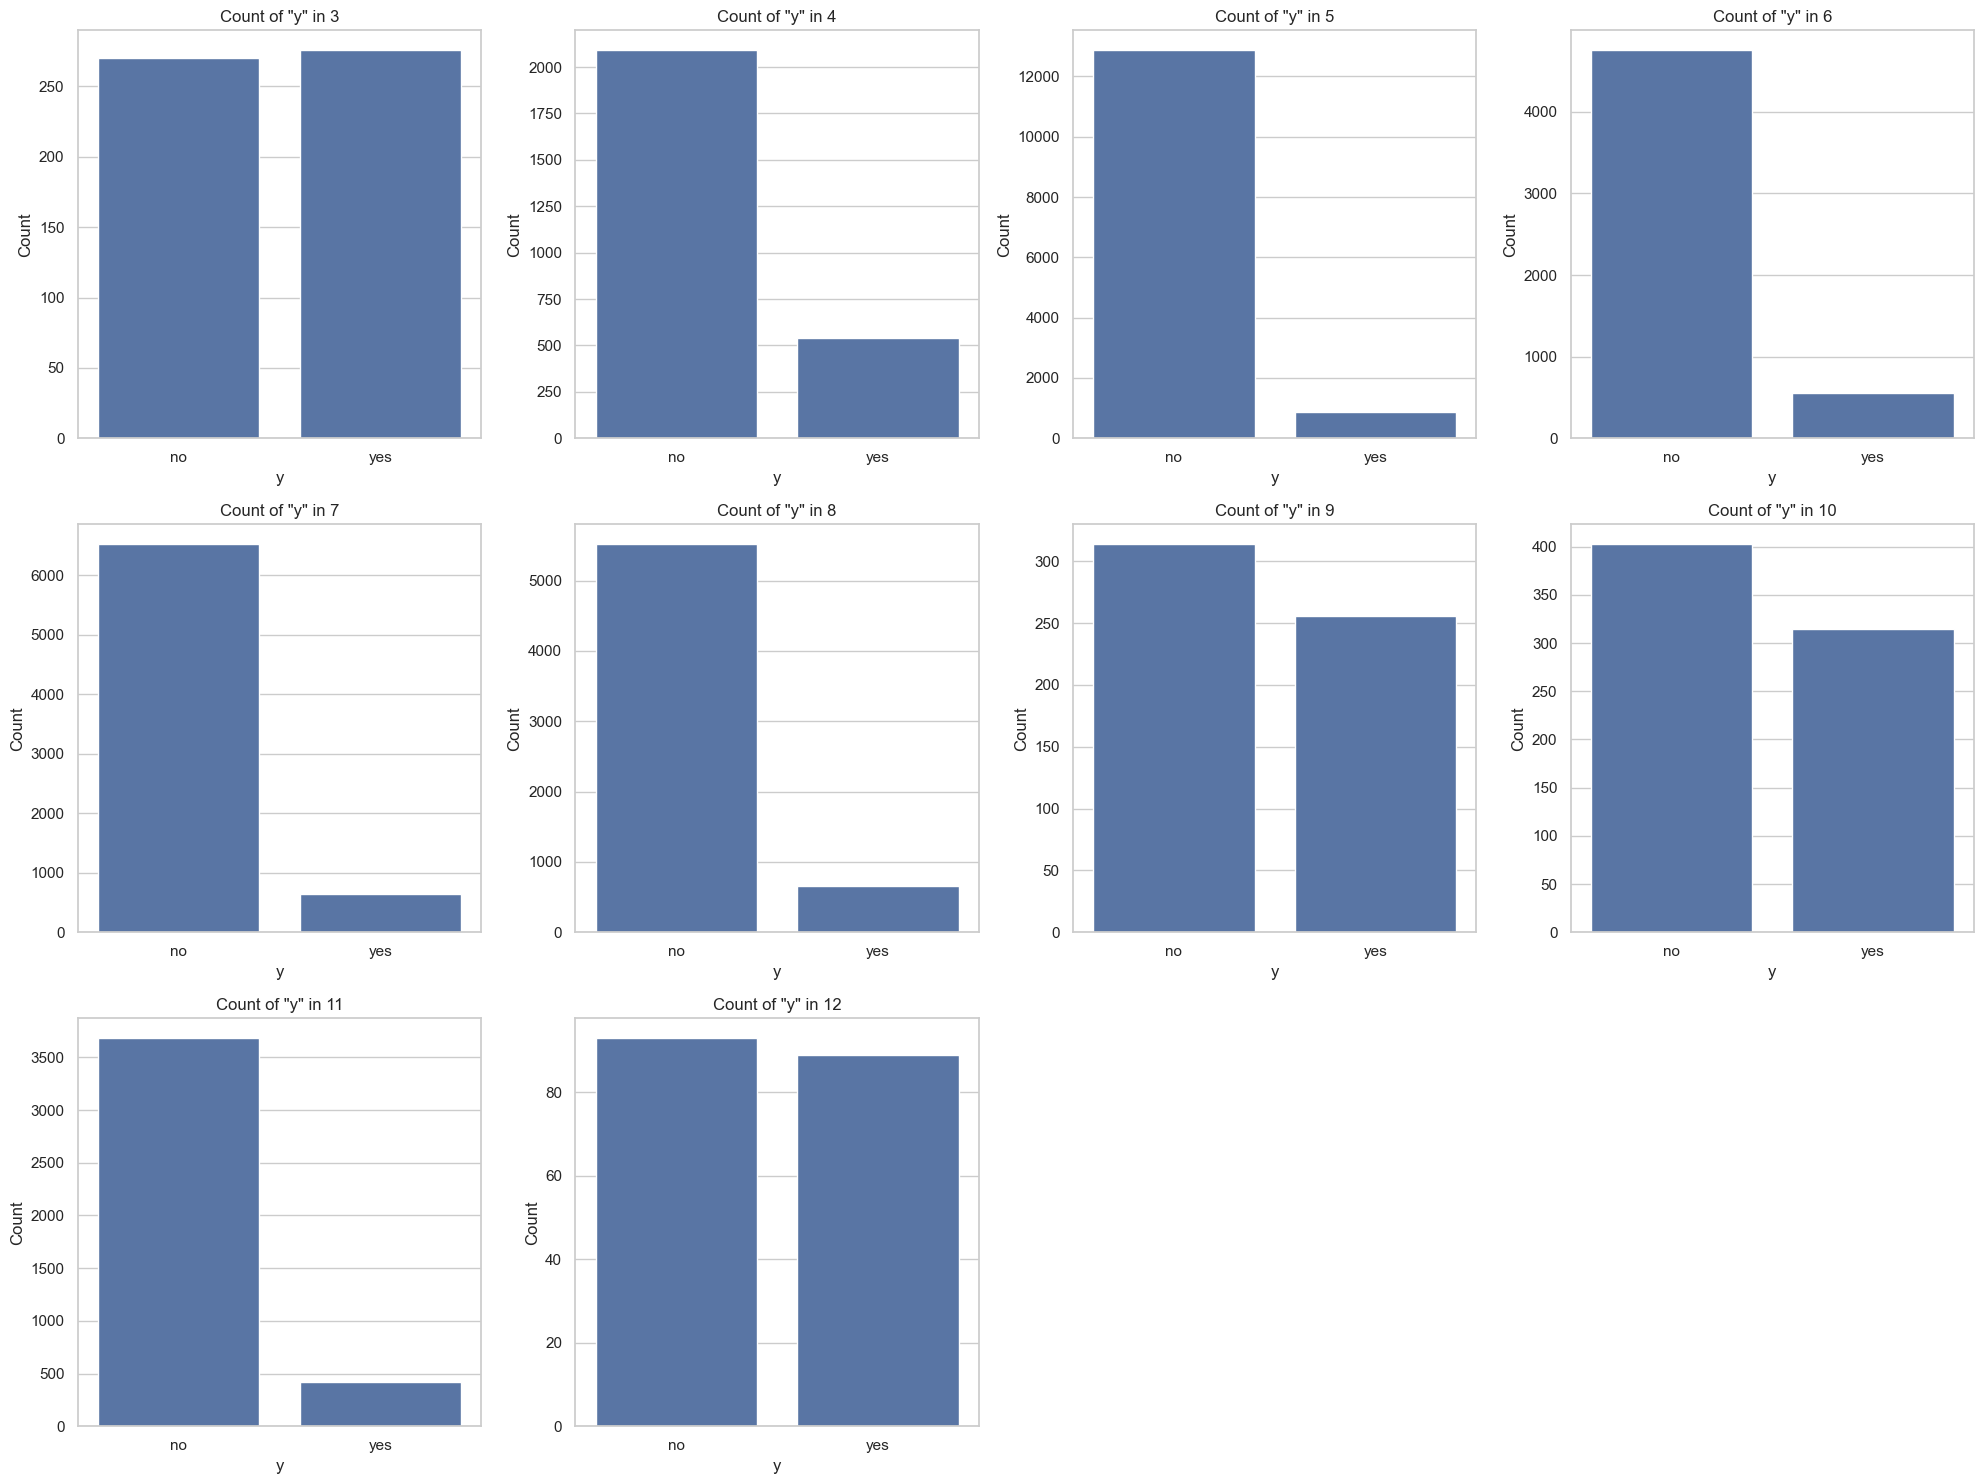

In [52]:
# Plot of target value (Yes or No) vs month, without taking the years into consideration.

unique_months = group_counts2['month_Column'].unique()  # Unique months
num_months = len(unique_months)
cols = 4  # Number of columns
rows = (num_months + cols - 1) // cols  # Calculate the number of rows needed

# Create a single figure for all plots
plt.figure(figsize=(20, 5 * rows))  # Adjust the figure size as needed

for i, month in enumerate(unique_months):
    # Filter data for the current month
    month_data = group_counts2[group_counts2['month_Column'] == month]
    
    # Create a subplot for the current month
    plt.subplot(rows, cols, i + 1)  # Create a grid of subplots
    sns.barplot(x='y', y='case_count', data=month_data)
    plt.title(f'Count of "y" in {month}')  # Customize title with month
    plt.xlabel('y')
    plt.ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


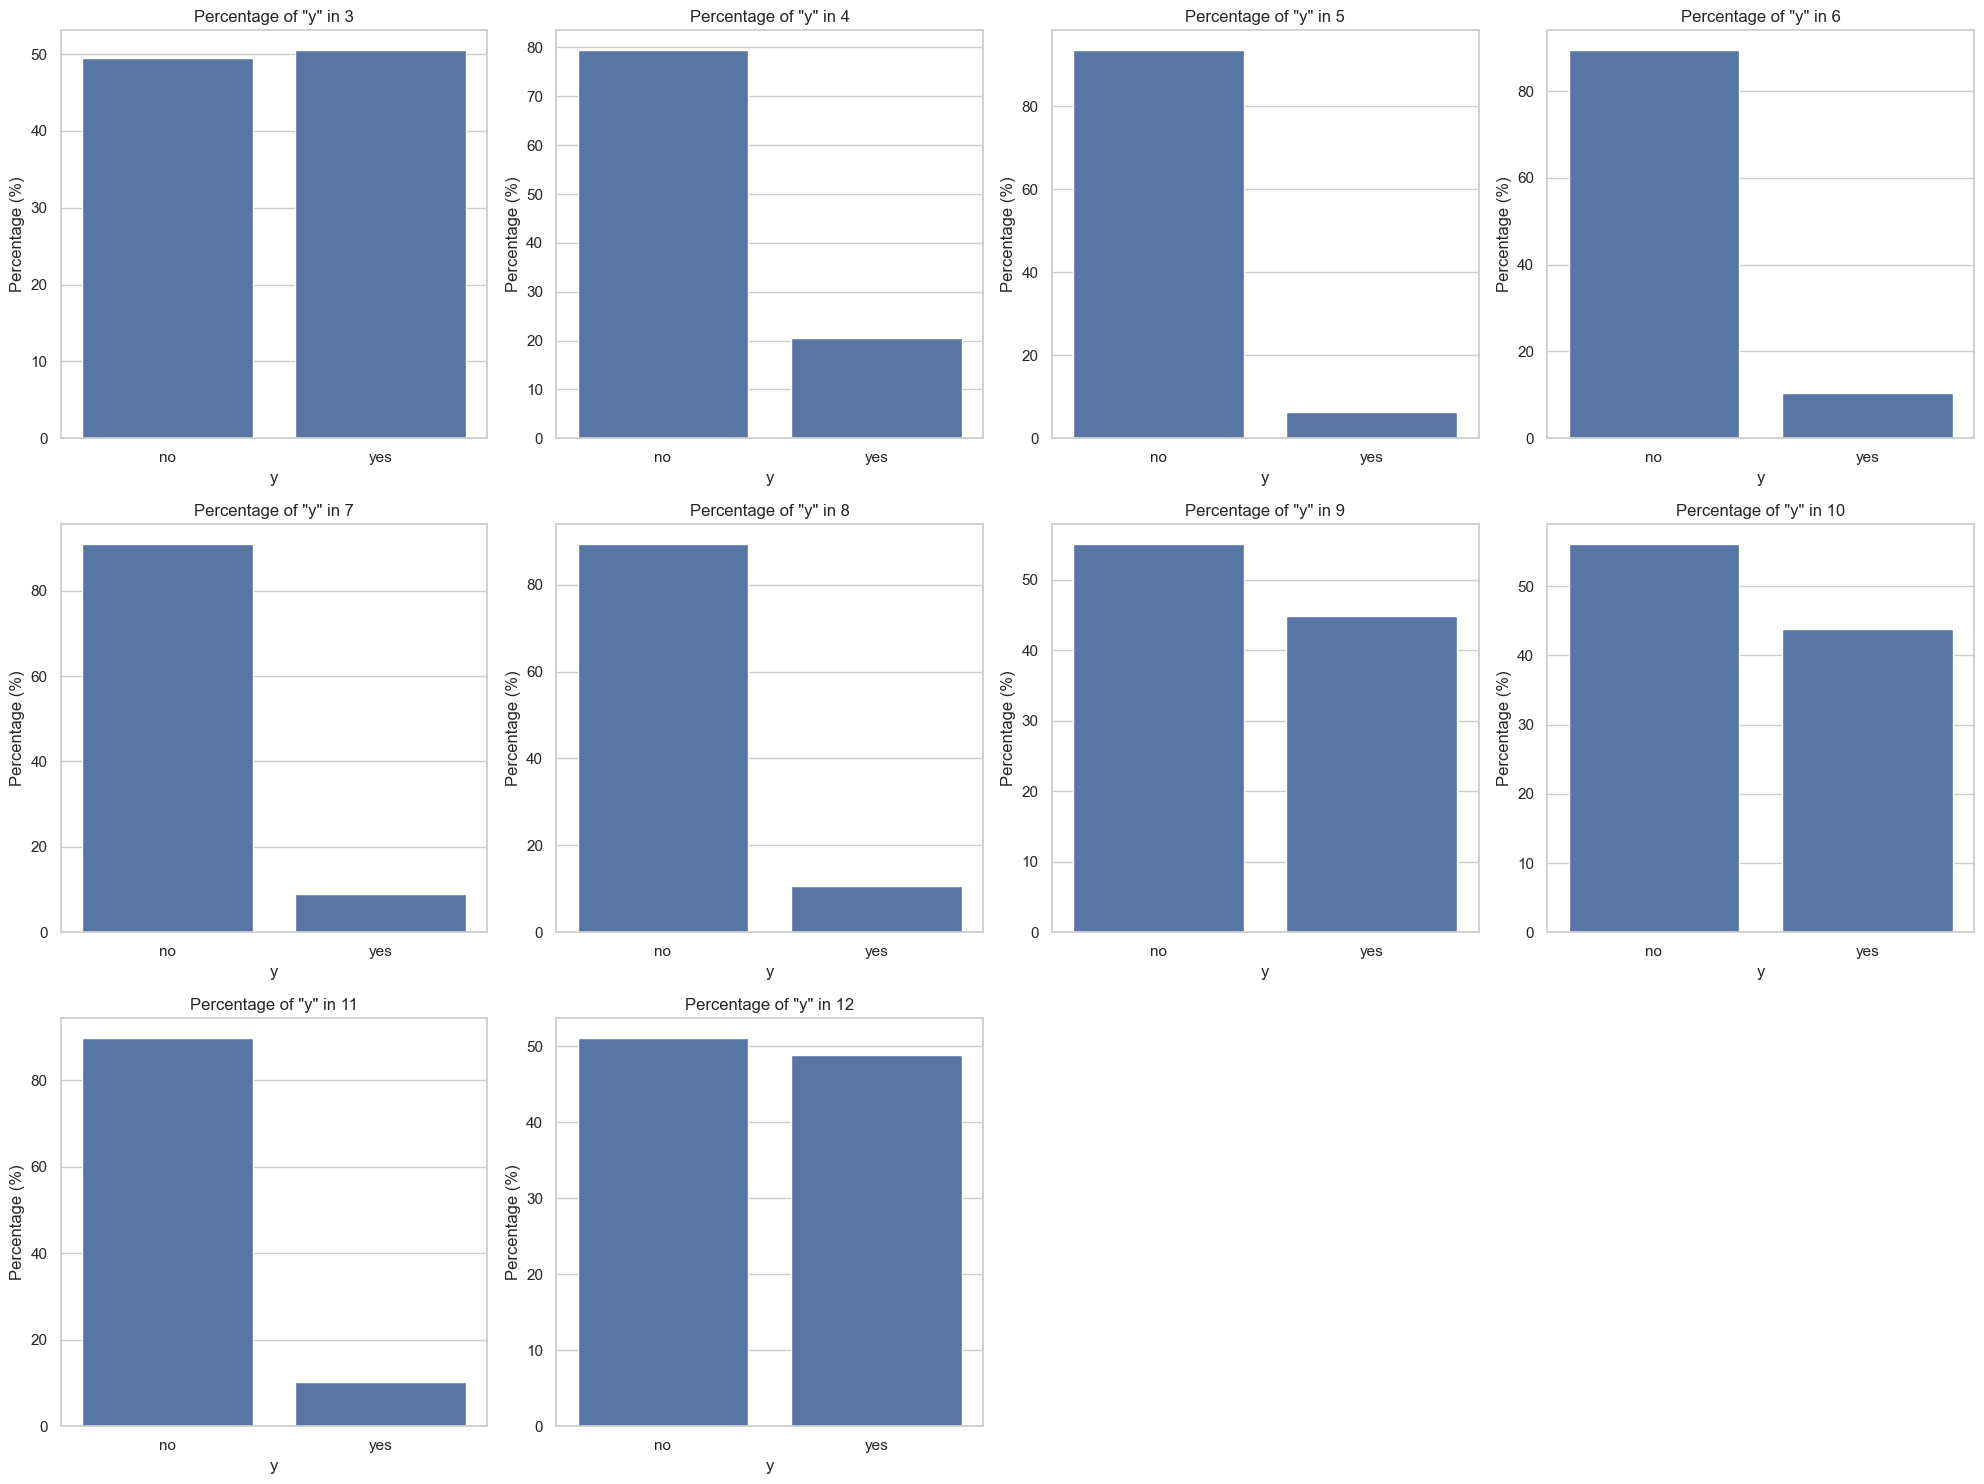

In [53]:
# Since the count of YES and NO shown above is very imbalanced, it doesn't allow us to extract meaningfull insights.
# To compare each month effectively, we need percentage values.

unique_months = group_counts2['month_Column'].unique()  # Unique months
num_months = len(unique_months)
cols = 4  # Number of columns
rows = (num_months + cols - 1) // cols  # Calculate the number of rows needed

# Create a single figure for all plots
plt.figure(figsize=(20, 5 * rows))  

for i, month in enumerate(unique_months):
    # Filter data for the current month
    month_data = group_counts2[group_counts2['month_Column'] == month]

    # Calculate total counts and percentages
    total_count = month_data['case_count'].sum()
    month_data['percentage'] = (month_data['case_count'] / total_count) * 100

    # Create a subplot for the current month
    plt.subplot(rows, cols, i + 1)  # Create a grid of subplots
    sns.barplot(x='y', y='percentage', data=month_data)
    plt.title(f'Percentage of "y" in {month}')  # Customize title with month
    plt.xlabel('y')
    plt.ylabel('Percentage (%)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


.

The plot above shows that the relationship between YES and NO is inconsistent. In some months, the distribution is balanced, while in others, it is very uneven. It would be helpful to break down the plots by **YEAR and MONTH**.

In [55]:
# Group the data by year - month, and create a new column being the concatenation of both to have a name for our horizontal axis.
year_month_df_aux = data.groupby(['Year','month','y'])
year_month_df = year_month_df_aux.size() 
year_month_df = year_month_df.reset_index() #transforma a estructura de dataframe
year_month_df.columns.values[3] = 'case_count'
year_month_df['Year_month'] = year_month_df['Year'].astype(str) + '_' + year_month_df['month'].astype(str)
year_month_df


,Year,month,y,case_count,Year_month
0,2008,5,no,7523,2008_5
1,2008,5,yes,240,2008_5
2,2008,6,no,4186,2008_6
3,2008,6,yes,188,2008_6
4,2008,7,no,6278,2008_7
5,2008,7,yes,407,2008_7
6,2008,8,no,4904,2008_8
7,2008,8,yes,271,2008_8
8,2008,10,no,25,2008_10
9,2008,10,yes,42,2008_10


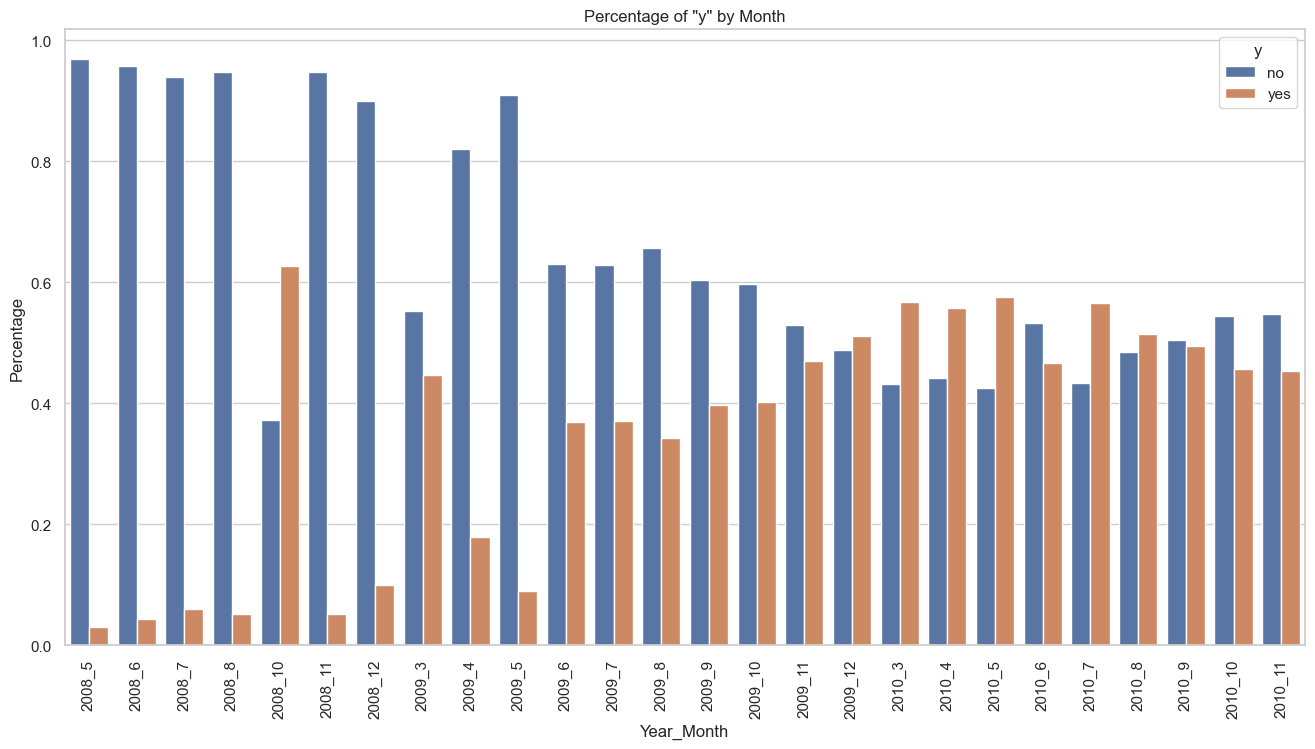

In [56]:
# Create a barplot showing a percentual relation between YES and NO as time passes (from 2008 to 2010)

test_df = year_month_df.copy()
test_df = test_df.drop(['Year','month'],axis=1)
test_df['totals_p_month'] = test_df.groupby(['Year_month'])['case_count'].transform('sum')
test_df['percentages'] = test_df['case_count'] / test_df['totals_p_month']

# Set the figure size (width, height)
plt.figure(figsize=(16, 8))

# Create the barplot
sns.barplot(x='Year_month', y='percentages', hue='y', data=test_df)

# Set labels and title
plt.xlabel('Year_Month')
plt.ylabel('Percentage')
plt.title('Percentage of "y" by Month')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()


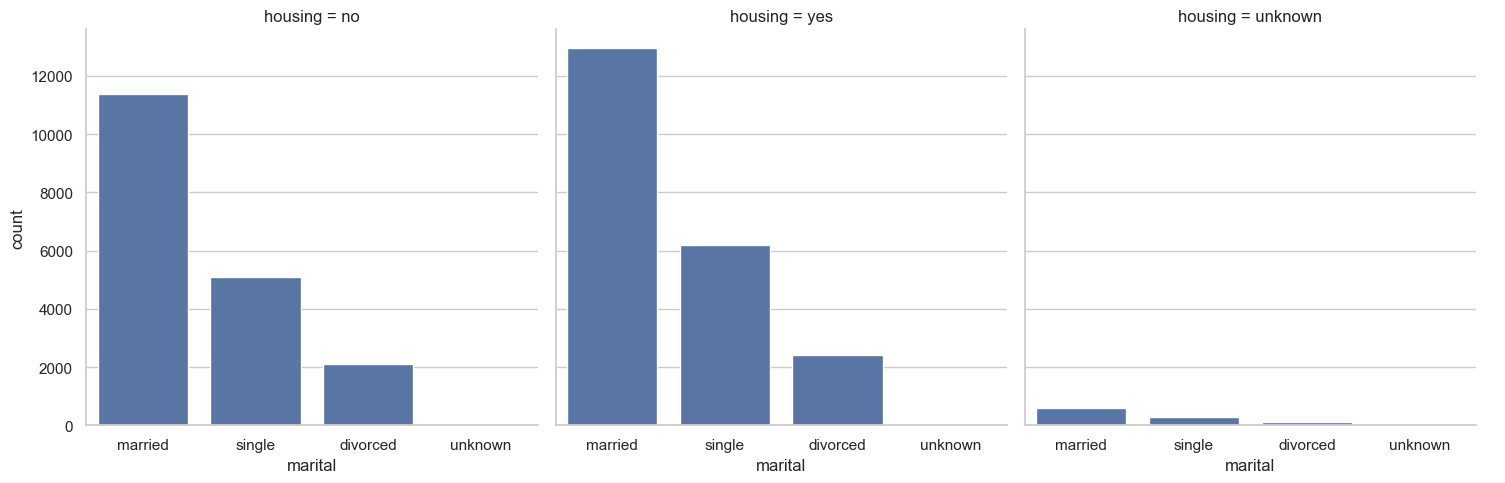

In [57]:
import seaborn as sns
sns.catplot(x='marital', col='housing', kind='count', data=data) #hay que verlo porcentualmente pq los datos también están desbalanceados.

### Numericals - Exploring the variables with PLOTS

#### Select the numeric type variables (int64 & float64) from our dataset

In [60]:
# Select columns of type int64 and float64
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f'There are {len(numeric_columns)} numeric columns (int64 and float64) \n\n')
for column in numeric_columns:
    unique_values = data[column].nunique()
    print(f"Column '{column}' has {unique_values} unique values.")


There are 12 numeric columns (int64 and float64) 


Column 'age' has 78 unique values.
Column 'month' has 10 unique values.
Column 'duration' has 1544 unique values.
Column 'campaign' has 42 unique values.
Column 'pdays' has 27 unique values.
Column 'previous' has 8 unique values.
Column 'emp.var.rate' has 10 unique values.
Column 'cons.price.idx' has 26 unique values.
Column 'cons.conf.idx' has 26 unique values.
Column 'euribor3m' has 316 unique values.
Column 'nr.employed' has 11 unique values.
Column 'Year' has 3 unique values.


However, there are some variables that even though they have the "numerical" type, they are two **ordinal categorical column we should not take into consideration, and these the "month" and "Year" columns**

In [62]:
numeric_columns.remove("month") #removes month column
numeric_columns.remove("Year") #removes Year column
numeric_columns.remove("duration") #removes duration column because it biases the data for our future ML model.

#### First statistical analysis

We can perform a symple statistical analysis to discover the main 

In [65]:
numeric_data = data[numeric_columns].copy()
numeric_data.describe() #provides statistical information such as: mean, std, min value, iq range, max value

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


We can see that the only column with an inconsistent range of data is "pdays". We must be careful with how we treat this column.

##### Age analysis

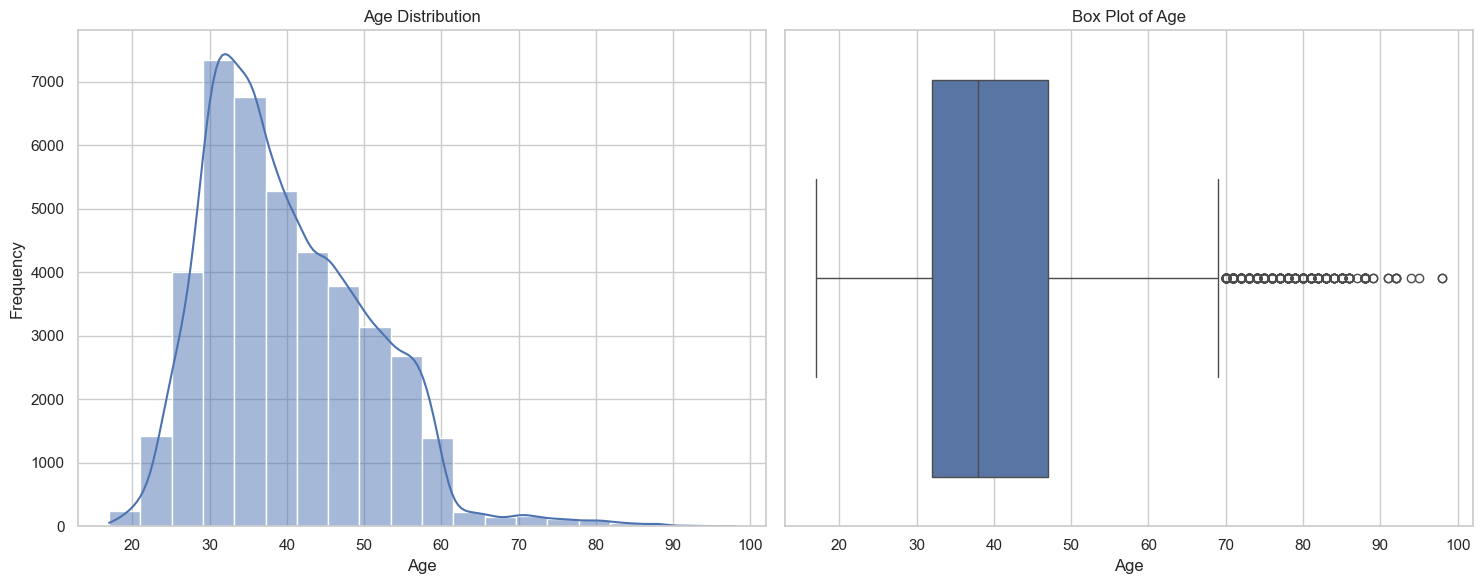

In [68]:
#Create fig to contain the plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histograma en el primer subplot
sns.histplot(numeric_data['age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Box plot en el segundo subplot
sns.boxplot(x=numeric_data['age'], ax=axes[1])
axes[1].set_title('Box Plot of Age')
axes[1].set_xlabel('Age')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

##### Other columns

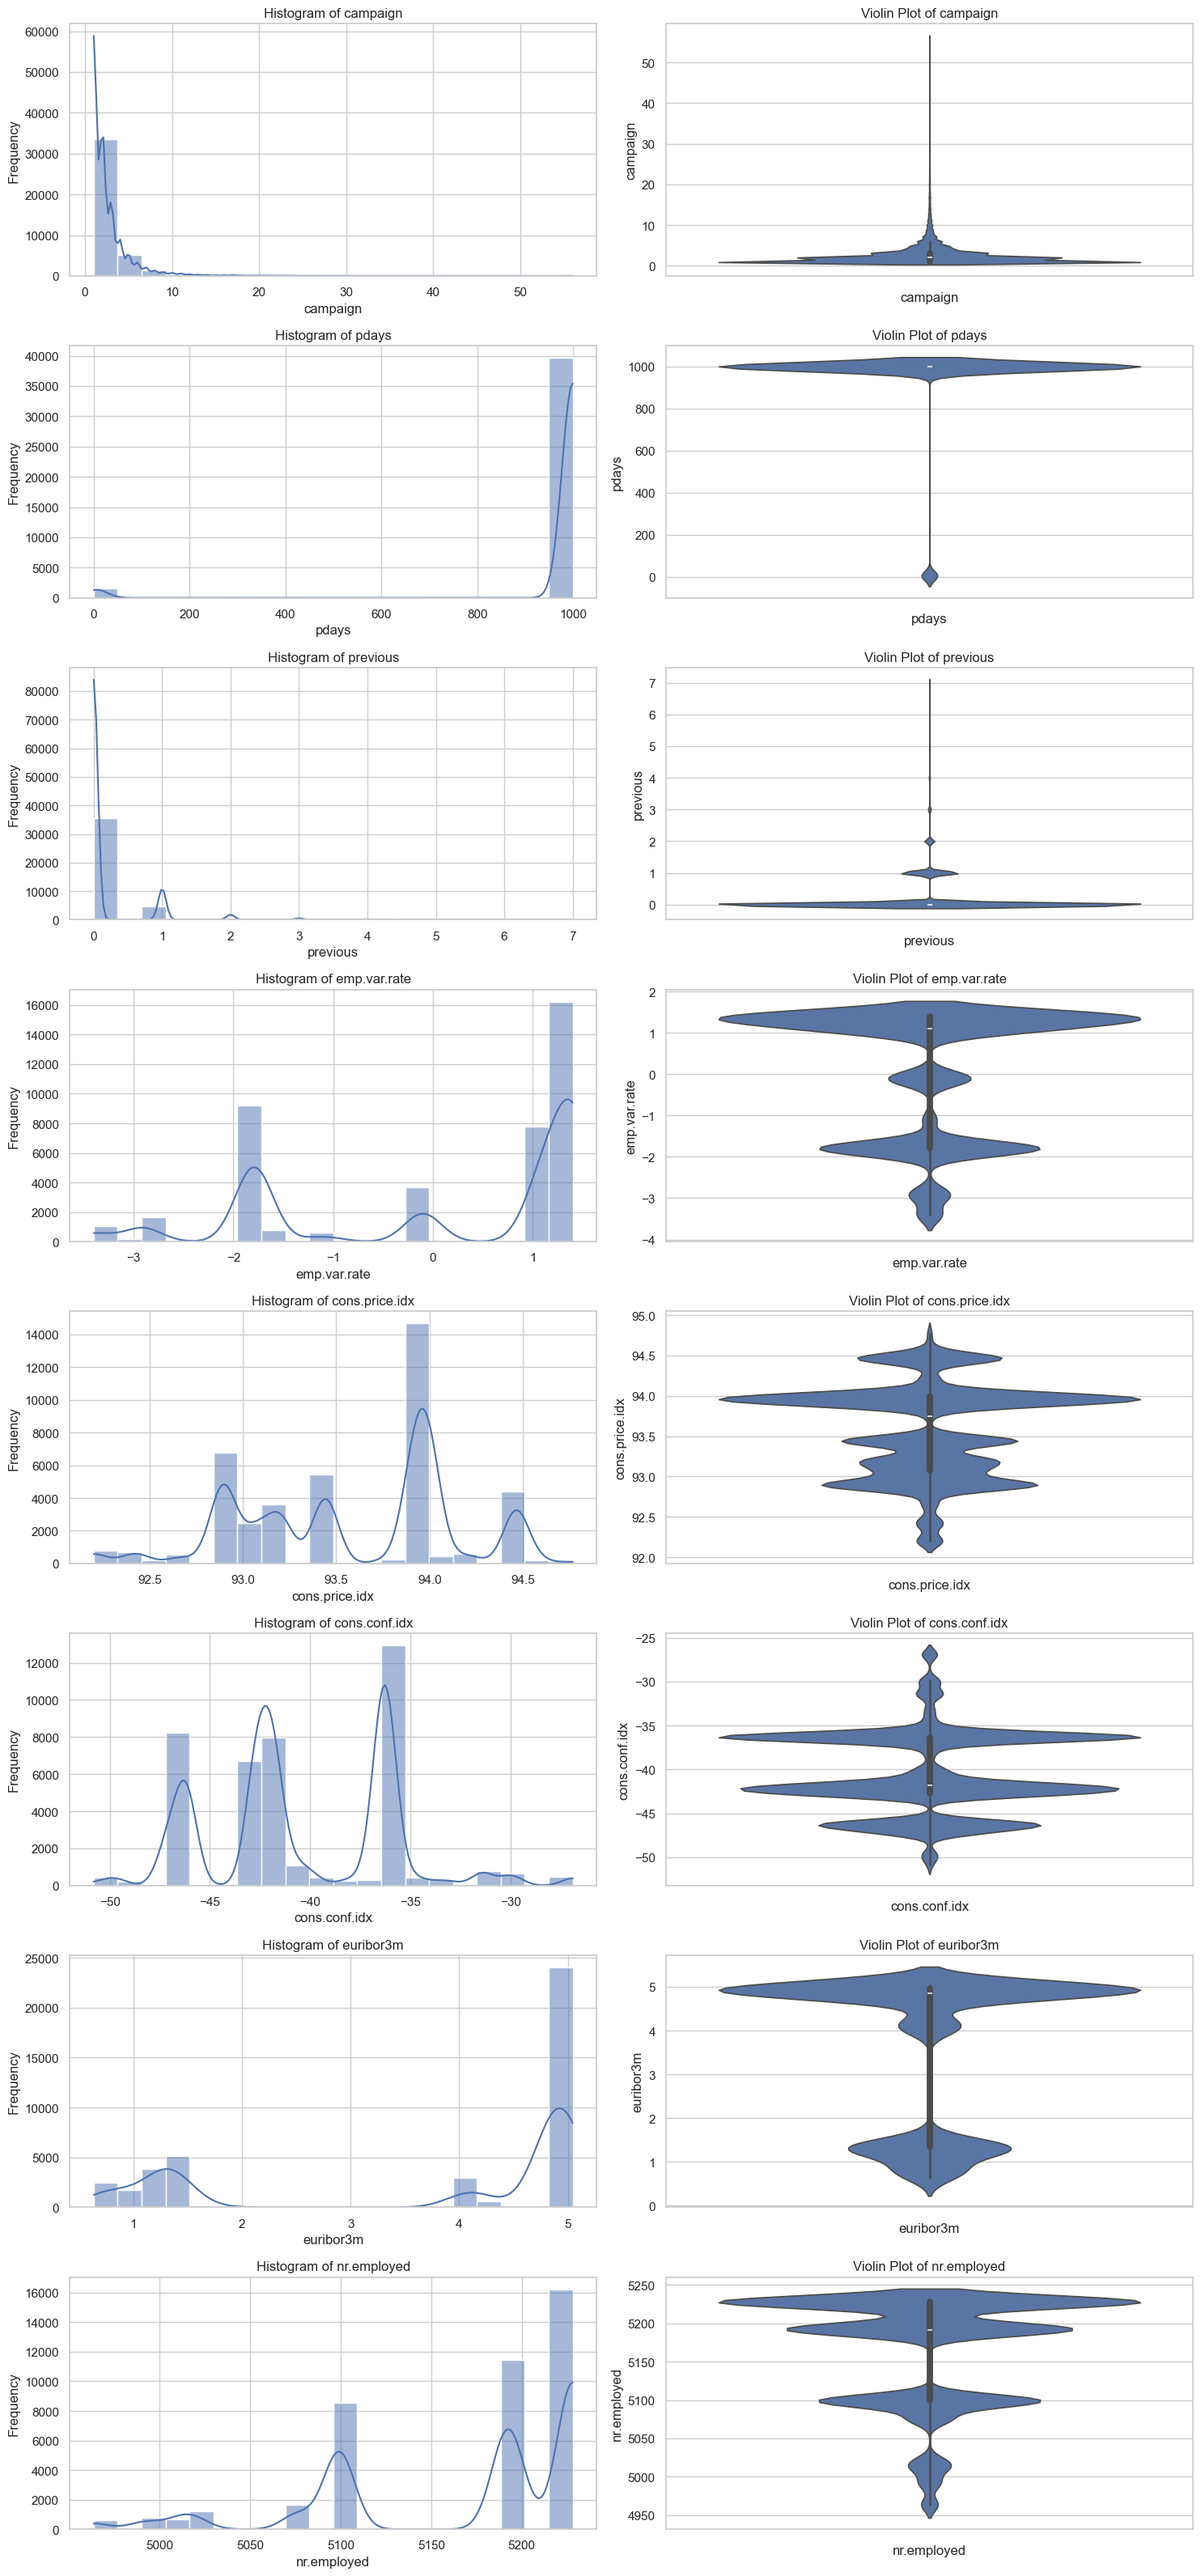

In [70]:
# List of variables to plot
variables = ['campaign', 'pdays', 'previous', 'emp.var.rate', 
             'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Create the figure and subplots (2 rows for each variable: one for histogram, one for violin plot)
fig, axes = plt.subplots(len(variables), 2, figsize=(15, 4 * len(variables)))

# Loop through each variable and create the histogram and violin plot
for i, var in enumerate(variables):
    # Histogram on the left
    sns.histplot(numeric_data[var], bins=20, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {var}')
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel('Frequency')
    
    # Violin plot on the right
    sns.violinplot(y=numeric_data[var], ax=axes[i, 1])
    axes[i, 1].set_title(f'Violin Plot of {var}')
    axes[i, 1].set_xlabel(var)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


We can see that the other variables are numerical and have a low number of unique values. However, they should still be treated as numerical because they represent rates with quantitative significance that can vary over time.

Additionally, the rest of the columns **do not have a normal distribution**. This is important because when we decide to normalize our data, a common practice is to use Z-Score normalization. However, this assumes our data is normally distributed, which is not our case. For that reason, we are going to use the MinMaxScaling normalization.

Reasons:
- It is Not Normally Distributed: Since most of our columns, except for Age, are not normally distributed, Z-score normalization might not be the best fit, as it assumes normality.

- It has No Significant Outliers: MinMaxScaling is succeptible to outliers. However, As we can observe in our plots, we do not have significant outliers except for columns "pdays" and "previous". We can eliminate the outliers from our dataset to allow a better visualization.

#### Detect outliers

In [73]:
# Identify outliers using the IQR method for pdays, previous and campaign
# For visualization purposed, we are probably going to remove a high number of data.
# The outlier detection will be further enhanced in future iterations in our notebook.
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.05)
    Q3 = data[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

pdays_outliers = detect_outliers_iqr(numeric_data, 'pdays')
previous_outliers = detect_outliers_iqr(numeric_data, 'previous')
campaign_outliers = detect_outliers_iqr(numeric_data, 'campaign')

# print(f"Outliers in 'pdays': \n{pdays_outliers}\n")
# print(f"Outliers in 'previous': \n{previous_outliers}\n")
# print(f"Outliers in 'previous': \n{campaign_outliers}\n")

.

**Now we know how many rows are considered outliers... but is it actually worth it to drop those columns? Let's check how many "YES" from the target column actually are contained within this outliers:**


###### **Analysis for column "previous":**

In [76]:
previous_y = data.groupby(["previous","y"])
previous_y = previous_y.size() 
previous_y2 = previous_y.reset_index() #transform to df structure
previous_y2.columns = ['previous', 'y', 'case_count'] #rename new column. By default it is named "0" and we can't manipulate it if it is not a string.
previous_y2['total_per_previous'] = previous_y2.groupby(['previous'])['case_count'].transform('sum') #create a column with the total of persons with each 
                                                                                            #job category
previous_y2['percentages'] = previous_y2['case_count'] / previous_y2['total_per_previous'] 
previous_y2

,previous,y,case_count,total_per_previous,percentages
0,0,no,32422,35563,0.911678
1,0,yes,3141,35563,0.088322
2,1,no,3594,4561,0.787985
3,1,yes,967,4561,0.212015
4,2,no,404,754,0.535809
5,2,yes,350,754,0.464191
6,3,no,88,216,0.407407
7,3,yes,128,216,0.592593
8,4,no,32,70,0.457143
9,4,yes,38,70,0.542857


###### **Analysis for column "pdays":**

In [78]:
pdays_y = data.groupby(["pdays","y"])
pdays_y = pdays_y.size() 
pdays_y2 = pdays_y.reset_index() #transform to df structure
pdays_y2.columns = ['pdays', 'y', 'case_count'] #rename new column. By default it is named "0" and we can't manipulate it if it is not a string.
pdays_y2['total_per_pdays'] = pdays_y2.groupby(['pdays'])['case_count'].transform('sum') #create a column with the total of persons with each 
                                                                                            #job category
pdays_y2['percentages'] = pdays_y2['case_count'] / pdays_y2['total_per_pdays']
pdays_y2

,pdays,y,case_count,total_per_pdays,percentages
0,0,no,5,15,0.333333
1,0,yes,10,15,0.666667
2,1,no,18,26,0.692308
3,1,yes,8,26,0.307692
4,2,no,24,61,0.393443
5,2,yes,37,61,0.606557
6,3,no,141,439,0.321185
7,3,yes,298,439,0.678815
8,4,no,55,118,0.466102
9,4,yes,63,118,0.533898


###### **Analysis for column "campaign":**

In [80]:
campaign_y = data.groupby(["campaign","y"])
campaign_y = campaign_y.size() 
campaign_y2 = campaign_y.reset_index() #transform to df structure
campaign_y2.columns = ['campaign', 'y', 'case_count'] #rename new column. By default it is named "0" and we can't manipulate it if it is not a string.
campaign_y2['total_per_campaign'] = campaign_y2.groupby(['campaign'])['case_count'].transform('sum') #create a column with the total of persons with each 
                                                                                            #job category
campaign_y2['percentages'] = campaign_y2['case_count'] / campaign_y2['total_per_campaign']
campaign_y2

,campaign,y,case_count,total_per_campaign,percentages
0,1,no,15342,17642,0.869629
1,1,yes,2300,17642,0.130371
2,2,no,9359,10570,0.885430
3,2,yes,1211,10570,0.114570
4,3,no,4767,5341,0.892529
5,3,yes,574,5341,0.107471
6,4,no,2402,2651,0.906073
7,4,yes,249,2651,0.093927
8,5,no,1479,1599,0.924953
9,5,yes,120,1599,0.075047


##### **Conclusions:**

.
.

Given the significant imbalance in our data, we believe it is not advisable to eliminate all rows classified as outliers. This is because, as the values for "previous" and "pdays" increase, the percentage of "YES" responses also rises.

As a result, we have decided to drop only one column: campaign. For the other two columns, previous and pdays, we will convert them into categorical variables with the following classifications:

**Previous (4 clusters):**

- 0 (0)
- 1 (1)
- 2 (2)
- 3-7 (more_than_2)
  
**Pdays (3 clusters):**

- 999 (first_call)
- 1-10 (one_to_ten_days)
- 11+ (more_than_10_days)

  
We will remove outliers from the campaign column, as they are minimal and do not significantly affect the "YES" outcomes. There appears to be no strong correlation between a high number of campaigns and a positive response.

#### Correlation Analysis

##### Remove outliers for corr plot

Given that our dataset has values with different ranges across each column, it is advisable to normalize the data before performing a correlation analysis. This will facilitate a more objective evaluation.

To enhance the objectivity of our analysis, we will **remove the outliers and the "pdays" column**, as we are uncertain how to interpret the value of 999 days. This indicates that it would be the first time the client is contacted, but it represents the highest value in the column, with over 90% of the data clustered around it. Therefore, we cannot simply eliminate those values.


In [86]:
def detect_outliers_iqr2(data, column): #almost same name as the other function, but this time we name it with a 2. 
                                        #Reason: the return is different, it returns 2 values (temporary and new data for DF)
    Q1 = data[column].quantile(0.05)
    Q3 = data[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a mask for outliers
    outliers_mask = (data[column] < lower_bound) | (data[column] > upper_bound)
    
    return data[outliers_mask], data[~outliers_mask]  # Return outliers and cleaned data. The "~" symbol acts as a NOT, because it 
                                                    # inverts the outliers_mask.
                                                    # This will return the TRUE values and the NON true values when finding outliers.

# Detect outliers and remove them. The coding is similar, but this time we added a number "2" to show differentiate them.
pdays_outliers2, numeric_data_cleaned2 = detect_outliers_iqr2(numeric_data, 'pdays')
previous_outliers2, numeric_data_cleaned2 = detect_outliers_iqr2(numeric_data_cleaned2, 'previous')
campaign_outliers2, numeric_data_cleaned2 = detect_outliers_iqr2(numeric_data_cleaned2, 'campaign')

# Apply Min-Max Scaling
scaler = MinMaxScaler()
numeric_data_normalized = numeric_data_cleaned2.copy()  # Create a copy of the cleaned data
numeric_data_normalized[numeric_data_normalized.columns] = scaler.fit_transform(numeric_data_normalized)

# Display the shape of the cleaned and normalized DataFrame
print(f"Cleaned DataFrame shape: {numeric_data_cleaned2.shape}")



Cleaned DataFrame shape: (39304, 9)


##### Correlation plot

 The columns that are going to be analyzed are: ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


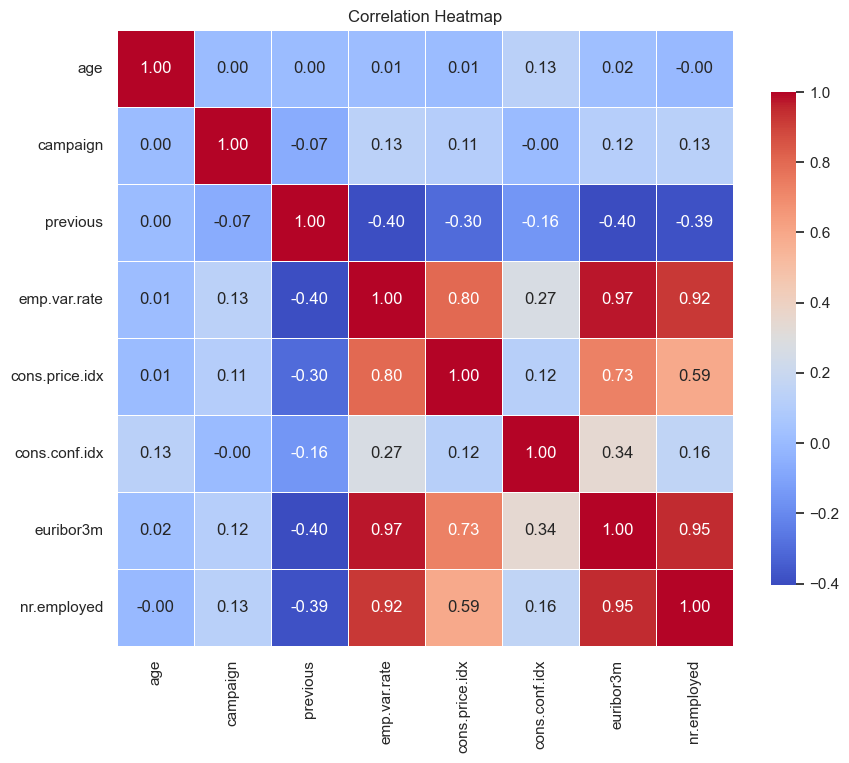

In [88]:
columns_for_correlation = numeric_data_cleaned2.columns.tolist() #columns of interest to plot
columns_for_correlation.remove('pdays')
print(f' The columns that are going to be analyzed are:', columns_for_correlation) 


# Calculate the correlation matrix
correlation_matrix = numeric_data_cleaned2[columns_for_correlation].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


##### Conclusion from our correlation analysis (in spanish and english):

###### **ENGLISH**:

1. **Strong Positive Correlations:**
- euribor3m and emp.var.rate: Very high correlation (0.97), indicating that as the three-month Euribor rate increases, the employment variation rate tends to increase as well.
- emp.var.rate and nr.employed: Also very high (0.92), suggesting that higher employment variation corresponds with a higher number of employed individuals.
- euribor3m and nr.employed: Strong correlation (0.95), reinforcing the relationship with employment.
  
2. **Moderate Correlations:** cons.price.idx and emp.var.rate (0.80) and cons.price.idx and euribor3m (0.73) suggest that price indices and employment variables are somewhat interlinked, possibly indicating economic factors affecting both.

3. **Negative Correlations:** The variable previous (which indicates the number of times the bank has contacted a customer before) has a negative relationship with emp.var.rate (the employment variation rate). This means that when there is a higher number of previous contacts, there tends to be a lower variation in employment.
The same occurs between previous and euribor3m. A higher number of previous contacts is also related to lower Euribor rates.
Additionally, there is a negative correlation between previous and nr.employed (the number of employees). This suggests that as the number of previous contacts increases, the number of employed individuals tends to decrease.

4. **Minimal Correlation:** age, campaign, and previous have very weak correlations with most other variables, suggesting they may not have a strong impact on the dependent variable.

5. **Campaign Effect:** The "campaign" variable shows weak relationships with most others, hinting that it might not significantly influence other factors, particularly the target variable "y."


**Summary:**
The matrix indicates strong relationships among economic indicators, while variables related to previous customer interactions (like previous and pdays) have notable negative correlations with these indicators.
The weak correlations of age and campaign suggest they may not be as relevant for predicting the target variable compared to economic factors.

###### **ESPAÑOL**:

1. **Correlaciones Positivas Fuertes:**
- euribor3m y emp.var.rate: Correlación muy alta (0.97), indicando que a medida que aumenta la tasa del Euribor a tres meses, la tasa de variación del - empleo tiende a aumentar también.
- emp.var.rate y nr.employed: También muy alta (0.92), sugiriendo que una mayor variación del empleo se corresponde con un mayor número de individuos empleados. 
- euribor3m y nr.employed: Fuerte correlación (0.95), reforzando la relación con el empleo.
  
2. **Correlaciones Moderadas:**
cons.price.idx y emp.var.rate (0.80) y cons.price.idx y euribor3m (0.73) sugieren que los índices de precios y las variables de empleo están algo interconectados, posiblemente indicando factores económicos que afectan a ambos.

3. **Correlaciones Negativas:**
La variable previous (que indica la cantidad de veces que el banco ha contactado a un cliente antes) tiene una relación negativa con emp.var.rate (la tasa de variación del empleo). Esto significa que cuando hay un mayor número de contactos previos, tiende a haber una menor variación en el empleo.
Lo mismo sucede entre previous y euribor3m. Un mayor número de contactos previos también se relaciona con tasas de Euribor más bajas.
Además, hay una correlación negativa entre previous y nr.employed (el número de empleados). Esto sugiere que a medida que aumenta el número de contactos previos, el número de personas empleadas tiende a disminuir.

4. **Correlación Mínima:**
age, campaign y previous tienen correlaciones muy débiles con la mayoría de las otras variables, lo que sugiere que pueden no tener un impacto fuerte en la variable dependiente.

5. **Efecto de Campaign:**
La variable "campaign" muestra relaciones débiles con la mayoría de las demás, insinuando que podría no influir significativamente en otros factores, particularmente en la variable objetivo "y".

**Resumen:**
La matriz indica relaciones fuertes entre los indicadores económicos, mientras que las variables relacionadas con las interacciones previas con los clientes (como previous y pdays) tienen correlaciones negativas notables con estos indicadores.
Las correlaciones débiles de age y campaign sugieren que pueden no ser tan relevantes para predecir la variable objetivo en comparación con los factores económicos.